# ***HOMEWORK 2 - Videogames Reviews***

### ***Libraries***

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter
import datetime
import time
from scipy.stats import chi2_contingency, ttest_ind ,chisquare, kruskal, pearsonr

In [7]:
df = pd.read_csv('/kaggle/input/steam-reviews-2021/steam_reviews.csv')
df.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


### *Before Starting, here is a brief summary of our situation!*
* ***Video games have grown from a childhood pastime to a global entertainment powerhouse, impacting culture and technology. Platforms like Steam have expanded beyond digital distribution, offering features such as game updates, social networking, and community tools. More than a store, Steam serves as a global hub for gamers to connect and share experiences.***
* ***Our assignment focuses on summarizing data based on customer needs and perspectives. This involves analyzing and condensing information in a way that reflects what is most relevant and valuable to customers, ensuring insights align with their expectations and enhance decision-making.***
* ***The following data is highly precise, helping the customer gain a clear and thorough understanding.***

________________________________________________________________________________________________________________________________________________________

## *[RQ1] Before diving deep into the dataset provided, it's crucial to understand its structure and main features. Data scientists usually take the first step of performing an Exploratory Data Analysis (EDA). What can you say about our dataset? Please perform an EDA and summarize the dataset's key characteristics using visualizations and tabular summaries.** 

In [4]:
print("Dataset shape:", df.shape)

Dataset shape: (21747371, 23)


In [51]:
## Initial Inspection: ##
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())

   Unnamed: 0  app_id                  app_name  review_id  language  \

0           0  292030  The Witcher 3: Wild Hunt   85185598  schinese   

1           1  292030  The Witcher 3: Wild Hunt   85185250  schinese   

2           2  292030  The Witcher 3: Wild Hunt   85185111  schinese   

3           3  292030  The Witcher 3: Wild Hunt   85184605   english   

4           4  292030  The Witcher 3: Wild Hunt   85184287  schinese   



                                              review  timestamp_created  \

0                            不玩此生遗憾，RPG游戏里的天花板，太吸引人了         1611381629   

1                                 拔DIAO无情打桩机--杰洛特!!!         1611381030   

2                                              巫师3NB         1611380800   

3  One of the best RPG's of all time, worthy of a...         1611379970   

4                                                 大作         1611379427   



   timestamp_updated  recommended  votes_helpful  ...  steam_purchase  \

0         1611381629        

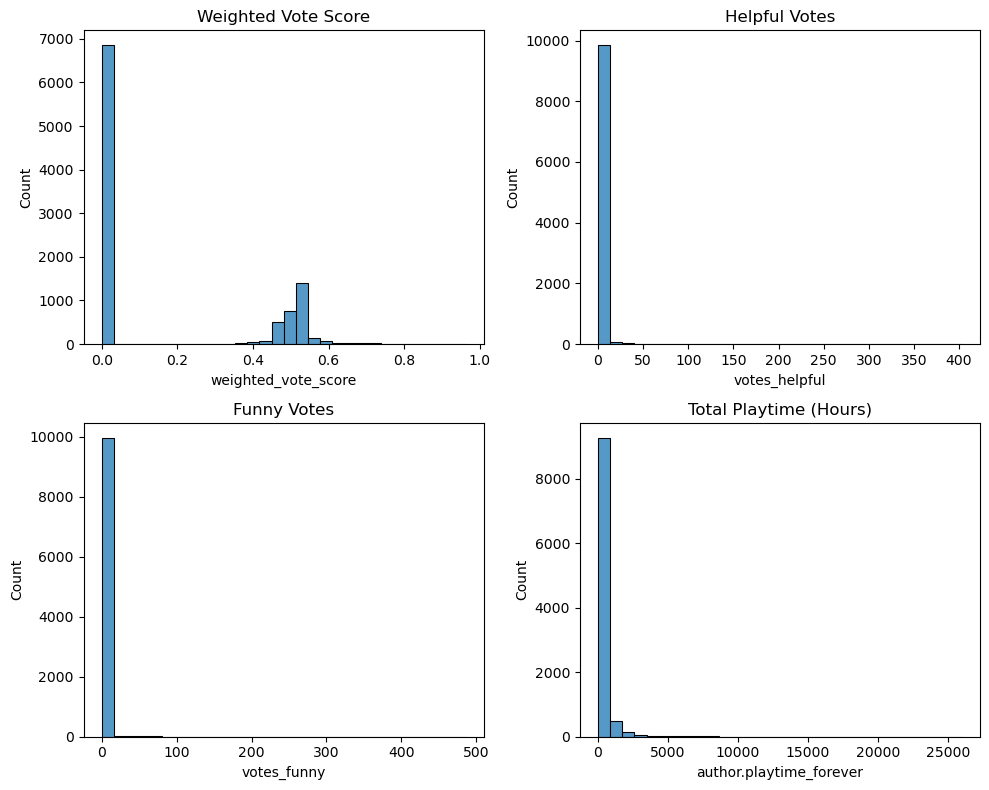

In [28]:
plt.figure(figsize=(10, 8))  # Smaller figure size
sample_df = df.sample(n=min(len(df), 10000), random_state=1)  # Sample up to 10,000 rows
plt.subplot(2, 2, 1)
sns.histplot(sample_df['weighted_vote_score'].dropna(), bins=30)  # Only histogram
plt.title('Weighted Vote Score')
plt.subplot(2, 2, 2)
sns.histplot(sample_df['votes_helpful'].dropna(), bins=30)
plt.title('Helpful Votes')
plt.subplot(2, 2, 3)
sns.histplot(sample_df['votes_funny'].dropna(), bins=30)
plt.title('Funny Votes')
plt.subplot(2, 2, 4)
sns.histplot(sample_df['author.playtime_forever'].dropna() / 60, bins=30)  # Only histogram
plt.title('Total Playtime (Hours)')
plt.tight_layout()  # Adjust layout
plt.show()

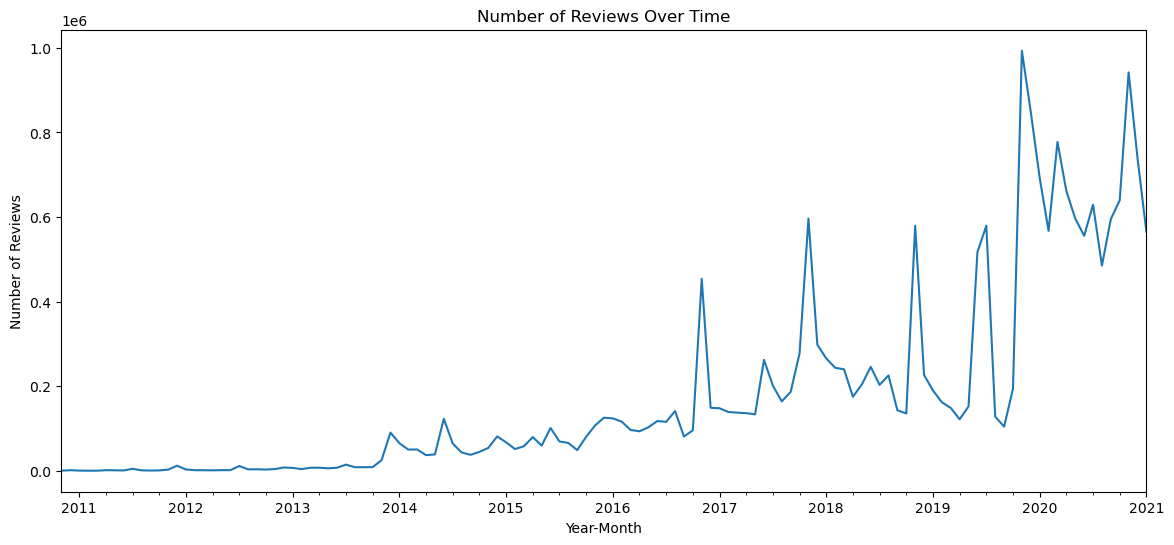

In [8]:
## Review Trends Over Time ##
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s', errors='coerce')
df['year_month'] = df['timestamp_created'].dt.to_period('M')
review_trends = df.groupby('year_month').size()
plt.figure(figsize=(14, 6))
review_trends.plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.show()

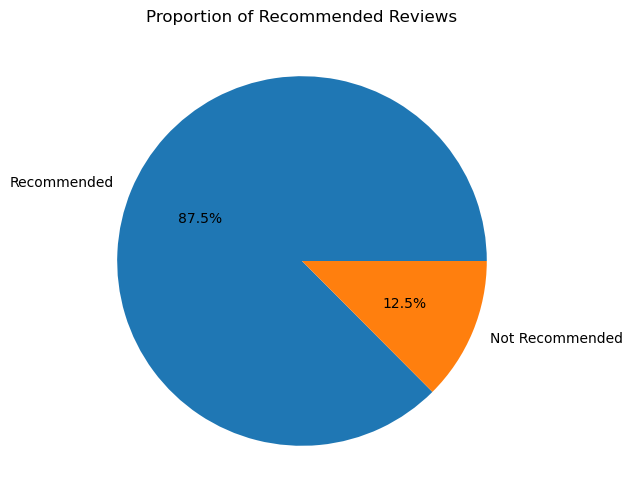

In [53]:
## Analysis of Review Recommendations ##
recommendation_counts = df['recommended'].value_counts()
plt.figure(figsize=(6, 6))
recommendation_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Recommended', 'Not Recommended'])
plt.title('Proportion of Recommended Reviews')
plt.ylabel('')
plt.show()

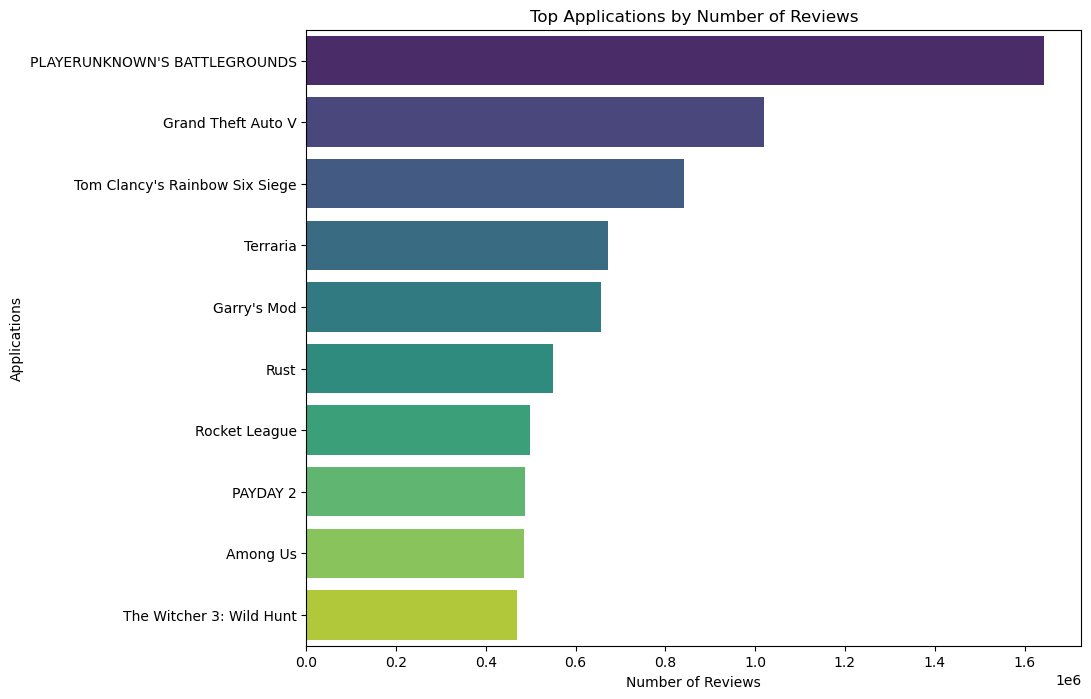

In [55]:
## Top 10 Most Reviewed Applications ##
top_apps = df['app_name'].value_counts().head(10)
plt.figure(figsize=(10, 8))
sns.barplot(y=top_apps.index, x=top_apps.values, hue=top_apps.index, palette="viridis", dodge=False, legend=False)
plt.title("Top Applications by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Applications")
plt.show()

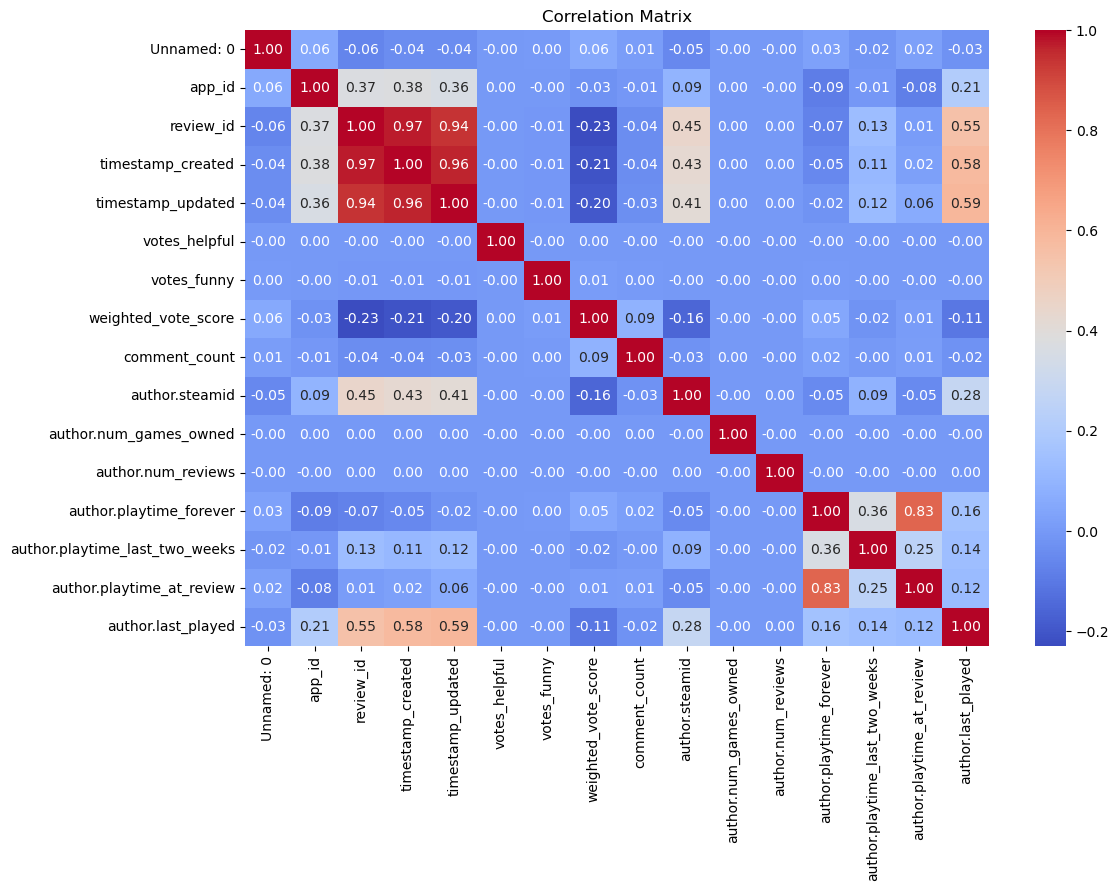

In [18]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

________________________________________________________________________________________________________________________________________________________

## *[RQ2] Explore the dataset by analyzing the distribution of reviews across different applications*

### *Identify which applications have the highest and lowest number of reviews.*

In [5]:
app_review_counts = df.groupby('app_id').size().reset_index(name='review_count')
app_review_counts = app_review_counts.merge(df[['app_id', 'app_name']].drop_duplicates(), on='app_id', how='left')
highest_reviews = app_review_counts.sort_values(by='review_count', ascending=False).head(1)
lowest_reviews = app_review_counts.sort_values(by='review_count', ascending=True).head(1)
print("Application with the highest number of reviews:")
print(highest_reviews)
print("\nApplication with the lowest number of reviews:")
print(lowest_reviews)

Application with the highest number of reviews:

     app_id  review_count                       app_name

196  578080       1644255  PLAYERUNKNOWN'S BATTLEGROUNDS



Application with the lowest number of reviews:

     app_id  review_count        app_name

144  454200           200  Neon Hardcorps


- ***PLAYERUNKNOWN'S BATTLEGROUNDS** has the highest reviews and **NEON HARDCORPS** has the least reviews out of all.*

### *Plot the number of reviews for each application in descending order. What insights can you draw from the plot?*

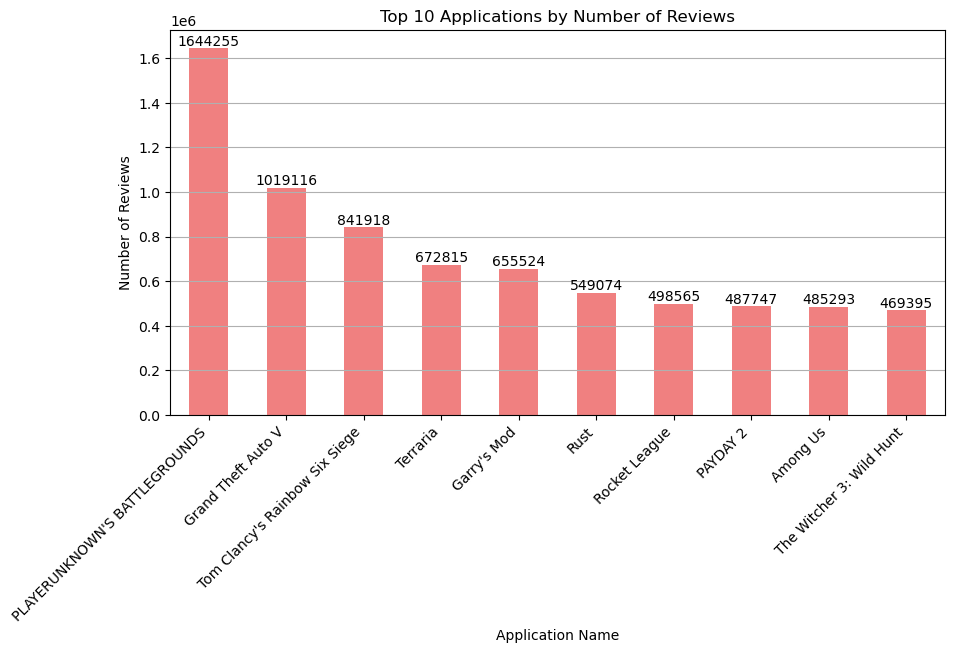

In [7]:
review_counts = df.groupby('app_name').size().sort_values(ascending=False)
top_review_counts = review_counts.head(10)
plt.figure(figsize=(10, 5))
ax = top_review_counts.plot(kind='bar', color='lightcoral')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
ax.set_xticklabels(top_review_counts.index, rotation=45, ha='right')
plt.title('Top 10 Applications by Number of Reviews')
plt.xlabel('Application Name')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()

*The bar chart shows the number of reviews for different popular games on Steam. Here are some insights:*

*Most Reviewed Game: **PLAYERUNKNOWN’S BATTLEGROUNDS has the highest number of reviews**, with over 1.6 million, indicating its immense popularity           and active player engagement.*
- *The top three games in terms of reviews are:*

    -	*PLAYERUNKNOWN’S BATTLEGROUNDS (1,644,255 reviews)
	-	Grand Theft Auto V (1,019,116 reviews)
	-	Tom Clancy’s Rainbow Six Siege (841,918 reviews)*
  	 *These games have substantially more reviews than the others, highlighting a higher engagement or player base.*	 
*Mid-Tier Engagement:*
- Terraria, Garry’s Mod, and Rust fall in the mid-range, with reviews between 655,000 and 549,000. This suggests these games have a strong, dedicated following but aren’t quite at the same level of engagement as the top three.*

*Lower Range Engagement:*

-  Games like PAYDAY 2, Among Us, The Witcher 3: Wild Hunt, and Rocket League are in the lower end of the top ten, with reviews               ranging from about 469,000 to 487,000. Although lower in comparison, these numbers still indicate a significant player base.*

*Player Interest:*
- The distribution of reviews suggests that first-person shooters and multiplayer games like PUBG, GTA V, and Rainbow Six               dominate in terms of player interest and engagement on Steam. However, indie games like Terraria and Among Us also have a considerable                   following.*


### *Which applications have the most and the least user recommendations? Summarize your findings.*

In [137]:
recommended_reviews = df[df['recommended'] == True]
recommendation_counts = recommended_reviews.groupby('app_name').size()
most_recommended = recommendation_counts.idxmax(), recommendation_counts.max()
least_recommended = recommendation_counts.idxmin(), recommendation_counts.min()
print(f"Most Recommended Application: {most_recommended[0]} with {most_recommended[1]} recommendations")
print(f"Least Recommended Application: {least_recommended[0]} with {least_recommended[1]} recommendations")

Most Recommended Application: PLAYERUNKNOWN'S BATTLEGROUNDS with 886417 recommendations

Least Recommended Application: Neon Hardcorps with 89 recommendations


### *Is there a correlation between the number of recommendations and the applications' review scores? Use a statistical test to confirm the significance of the relationship.*


In [144]:
total_recommendations = df.groupby('app_name')['recommended'].sum()
average_scores = df.groupby('app_name')['weighted_vote_score'].mean()
correlation_data = pd.DataFrame({
    'total_recommendations': total_recommendations,
    'average_scores': average_scores
}).dropna()  # Drop NaN values to avoid issues with correlation calculation
correlation_coefficient, p_value = pearsonr(correlation_data['total_recommendations'], correlation_data['average_scores'])
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Yes, There is a significant correlation between recommendations and review scores.")
else:
    print("There is no significant correlation between recommendations and review scores.")

Correlation Coefficient: -0.30322191193110437

P-Value: 4.0182028905590576e-08

Yes, There is a significant correlation between recommendations and review scores.


________________________________________________________________________________________________________________________________________________________

## *[RQ3] Understanding when users are most active in submitting reviews can help identify peak engagement periods.* 

### *Plot the number of reviews submitted each month and describe any trends.*

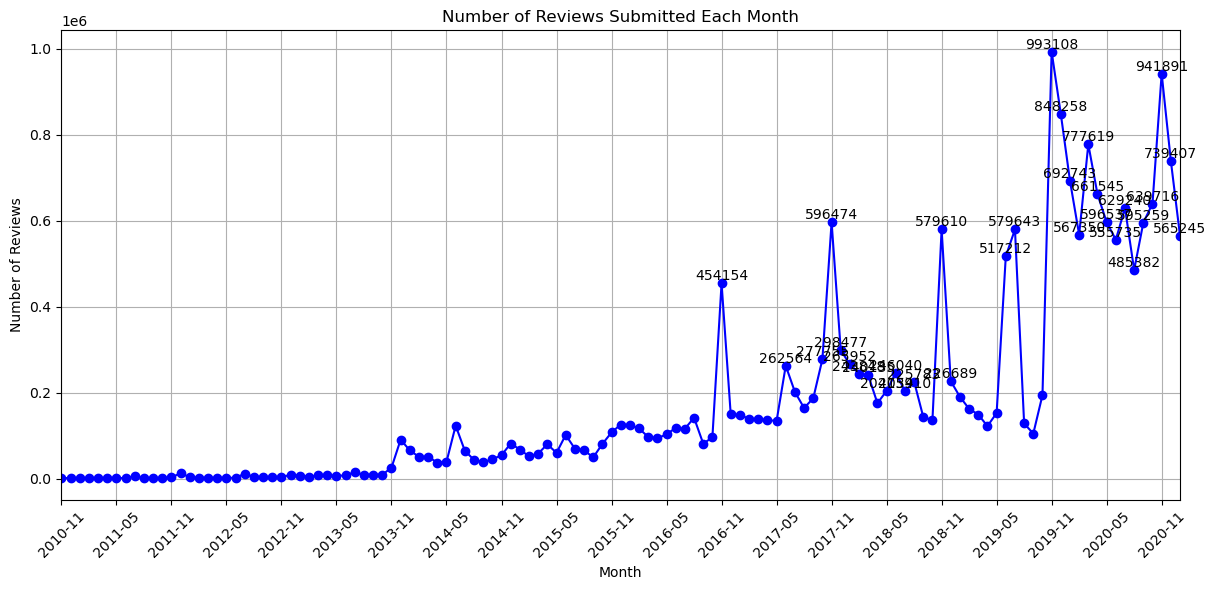

    year_month  review_count

0      2010-11           555

1      2010-12          1818

2      2011-01           824

3      2011-02           577

4      2011-03           591

..         ...           ...

118    2020-09        595259

119    2020-10        639716

120    2020-11        941891

121    2020-12        739407

122    2021-01        565245



[123 rows x 2 columns]


In [37]:
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')
df['year_month'] = df['timestamp_created'].dt.to_period('M')
monthly_reviews = df.groupby('year_month').size().reset_index(name='review_count')
plt.figure(figsize=(12, 6))
plt.plot(monthly_reviews['year_month'].astype(str), monthly_reviews['review_count'], marker='o', linestyle='-', color='b')
plt.xticks(ticks=monthly_reviews.index[::6], labels=monthly_reviews['year_month'].astype(str)[::6], rotation=45)
plt.title('Number of Reviews Submitted Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid()
threshold = monthly_reviews['review_count'].quantile(0.75)  # Change to show top 25%
for i, v in enumerate(monthly_reviews['review_count']):
    if v >= threshold:
        plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.xlim(monthly_reviews['year_month'].astype(str).iloc[0], monthly_reviews['year_month'].astype(str).iloc[-1])  # Limit x-axis range
plt.show()
print(monthly_reviews)

*The monthly review data shows:*

- *Initial Growth (2010-2013): A steady increase in reviews, reflecting rising user engagement.*
- *Fluctuations (2014-2019):Notable spikes during major game releases or sales, indicating fluctuating user interest.*
- *Surge in Reviews (Late 2019-2021): A significant spike starting in late 2020, peaking in November 2020 with 941,891 reviews, likely due to increased gaming during the pandemic and holiday sales.*
- *Sustained Engagement: High review volumes above 500,000 monthly continued into early 2021, suggesting a normalization of review-writing among gamers.*

***Summary***
- *Overall, the data indicates a trend of increasing user engagement over time, with significant spikes tied to external events such as game releases or seasonal sales. The steady rise and eventual surge in reviews highlight how user interaction with the platform has evolved, likely influenced by broader gaming culture and community engagement.*

### *Identify any seasonal patterns or trends in review activity. Explain any seasonal impact you notice.*

 *Based on the monthly review counts from November 2010 to January 2021, several trends and seasonal patterns emerge:*

- *Upward Trend: The total number of reviews has significantly increased over time, from 555 in November 2010 to peaks over 900,000 by late 2020.*
- *Seasonal Peaks: Review activity spikes in November and December, likely due to holiday shopping and major sales events like Black Friday and Christmas.*

- *Lower Activity in Off-Peak Months: Review counts dip in months like February and March, suggesting reduced engagement during periods with fewer game releases or promotions.*

- *End-of-Year Surge: Increased reviews in the last quarter reflect heightened consumer activity during the holiday season, often linked to the launch of anticipated titles.*

*Conclusion:
The data indicates strong seasonal patterns tied to consumer behavior and industry trends, highlighting opportunities for marketers and developers to time promotions and releases effectively.*

### *Determine if certain times of the year have higher engagement rates. Describe noticeable peaks in user activity.*

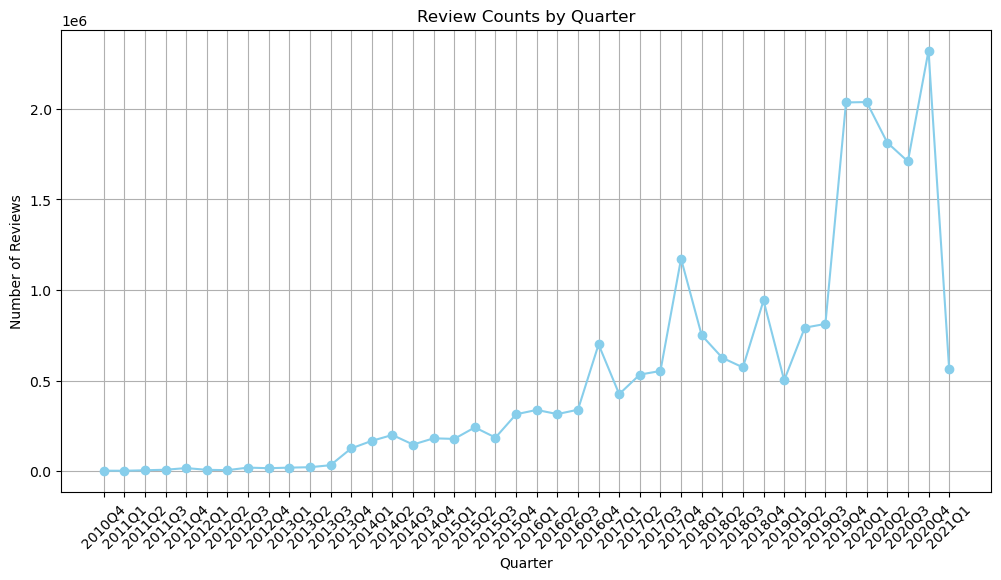

In [70]:
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s', errors='coerce')
df['year_quarter'] = df['timestamp_created'].dt.to_period('Q')
quarterly_reviews = df.groupby('year_quarter').size().reset_index(name='review_count')
plt.figure(figsize=(12, 6))
plt.plot(quarterly_reviews['year_quarter'].astype(str), quarterly_reviews['review_count'], marker='o', color='skyblue')
plt.xticks(rotation=45)
plt.title('Review Counts by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

***The last quarter of each year consistently shows higher engagement levels compared to other quarters.***

*The engagement peaks in review submissions occurred during the last quarter of 2020, with the following notable figures:*

- October 2020: 639,716 reviews submitted.
- November 2020: 941,891 reviews submitted, marking the highest engagement.
- December 2020: 739,407 reviews submitted.
- These figures indicate a significant increase in user activity during November 2020, suggesting that users were particularly active in providing feedback during this period. This spike may correlate with seasonal factors such as holiday sales or the release of popular games, driving higher engagement and review submissions.

### *What is the most common time of day users write reviews? For example, users might typically write reviews at 17:44. Explain how this time distribution could influence your analysis.*

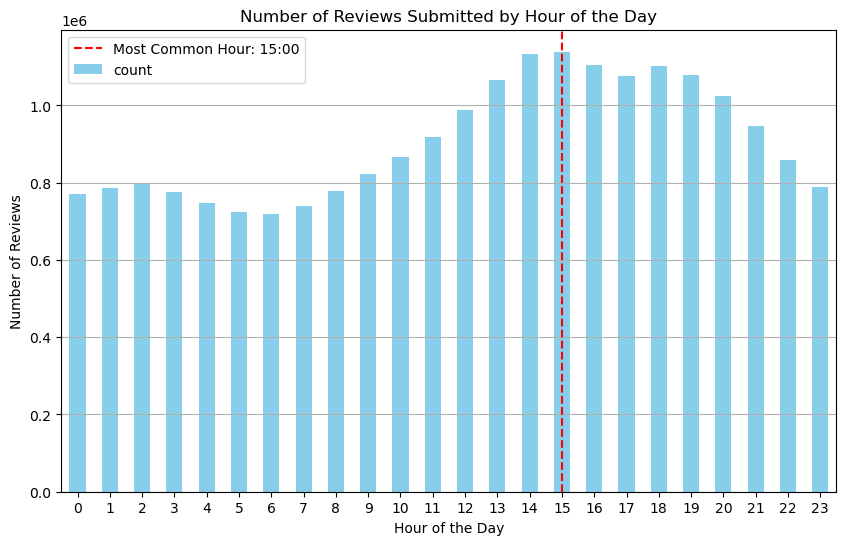

The most common time for writing reviews is: 15:00 with 1139129 reviews.


In [19]:
if df['timestamp_created'].dtype == 'int64':
    df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s', errors='coerce')
df = df.dropna(subset=['timestamp_created'])
df['review_hour'] = df['timestamp_created'].dt.hour
hourly_review_counts = df['review_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
hourly_review_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Reviews Submitted by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')
most_common_hour = hourly_review_counts.idxmax()
plt.axvline(most_common_hour, color='red', linestyle='--', label=f'Most Common Hour: {most_common_hour}:00')
plt.legend()
plt.show()
print(f"The most common time for writing reviews is: {most_common_hour}:00 with {hourly_review_counts.max()} reviews.")

- *User Behavior Insights: Knowing the peak hours for review submissions can provide insights into user behavior, such as whether users are more active after work hours or during specific times of day.*
- *Data Sampling: If your analysis is based on a limited timeframe, consider the time of day to ensure it accurately reflects user engagement. For example, if most reviews come in the evening, analyses performed during the day might miss crucial patterns.*
- *Marketing and Notifications: Understanding when users are most active can inform marketing strategies and timing for notifications or engagement initiatives aimed at soliciting reviews.*
- 
*This analysis can help tailor user engagement strategies and provide context when interpreting review data trends.*

### *Create a function that accepts a list of time intervals and plots the number of reviews for each interval.*

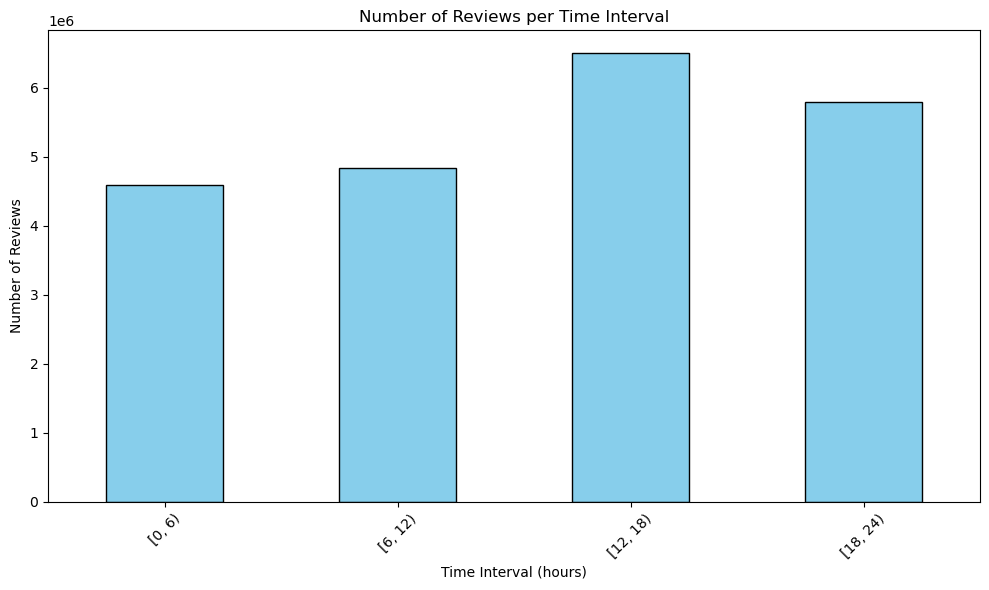

In [21]:
if 'review_hour' in df.columns:
    # Function to plot reviews for specified time intervals
    def plot_reviews_by_intervals(df, intervals):
        df['time_interval'] = pd.cut(df['review_hour'], bins=intervals, right=False, include_lowest=True)
        interval_counts = df['time_interval'].value_counts().sort_index()
        plt.figure(figsize=(10, 6))
        interval_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Number of Reviews per Time Interval')
        plt.xlabel('Time Interval (hours)')
        plt.ylabel('Number of Reviews')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    intervals = [0, 6, 12, 18, 24]
    plot_reviews_by_intervals(df, intervals)
else:
    print("The dataset does not contain a 'review_hour' column.")

*The chart shows the number of reviews across different time intervals in a day. The highest review activity occurs between 12-18 hours and 18-24 hours, indicating peak engagement in the latter half of the day.*

### *Use the function to plot the number of reviews for the following time intervals:*

        Initial Time	Final Time
-
        00:00:00	02:59:59
        03:00:00	05:59:59
        06:00:00	10:59:59
        11:00:00	13:59:59
        14:00:00	16:59:59
        17:00:00	19:59:59
        20:00:00	23:59:59
##### *Summarize your findings from the time interval analysis.*

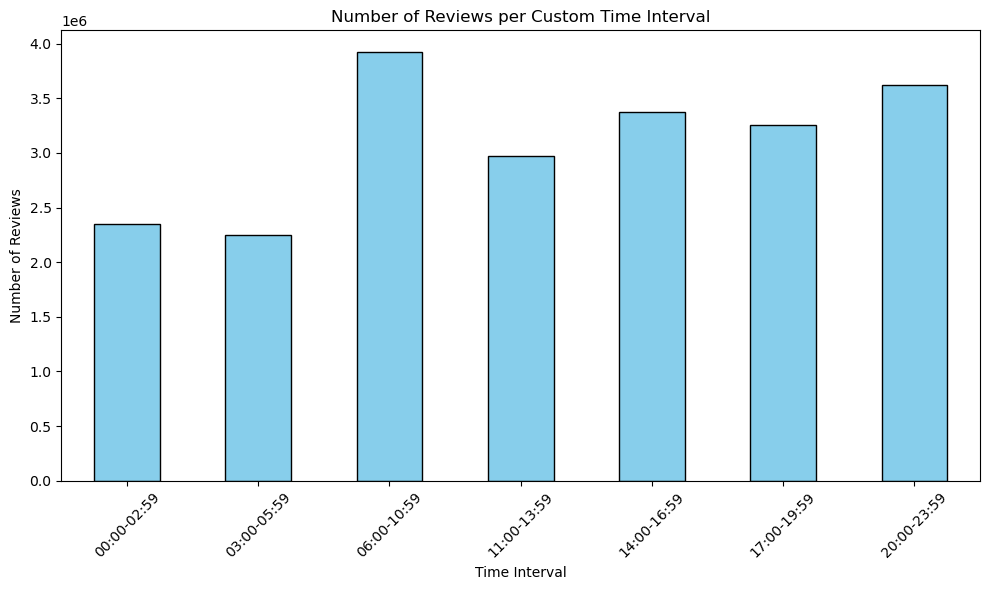

In [25]:
if 'review_hour' in df.columns:
    def plot_reviews_by_intervals(df):
        # Define the intervals in hours and labels for the specified ranges
        intervals = [0, 3, 6, 11, 14, 17, 20, 24]
        labels = [
            '00:00-02:59', '03:00-05:59', '06:00-10:59', '11:00-13:59',
            '14:00-16:59', '17:00-19:59', '20:00-23:59'
        ]
        df['time_interval'] = pd.cut(df['review_hour'], bins=intervals, labels=labels, right=False, include_lowest=True)
        interval_counts = df['time_interval'].value_counts().sort_index()
        plt.figure(figsize=(10, 6))
        interval_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Number of Reviews per Custom Time Interval')
        plt.xlabel('Time Interval')
        plt.ylabel('Number of Reviews')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    plot_reviews_by_intervals(df)
else:
    print("The dataset does not contain a 'review_hour' column.")

***The bar chart shows the distribution of review submissions across specific time intervals in a day. Here’s a summary of the findings:***

- *06:00-10:59 appears to have the highest number of reviews, indicating increased engagement in the morning hours.*
- *14:00-16:59, 17:00-19:59, and 20:00-23:59 also show high review counts, suggesting that user activity spikes in the afternoon and evening.*
- *00:00-05:59 intervals have fewer reviews, which is consistent with lower user engagement late at night and early morning.
This pattern suggests that users are most active in writing reviews during typical waking hours, with peaks around morning and evening time, possibly aligning with user availability and leisure hours.*

________________________________________________________________________________________________________________________________________________________

## *[RQ4] Investigating whether users who spend more time using an application give higher or lower ratings.*

### *Analyze the relationship between the amount of time a user has spent on an application and their review score.*

In [28]:
df['author.playtime_at_review'] = pd.to_numeric(df['author.playtime_at_review'], errors='coerce')
df['weighted_vote_score'] = pd.to_numeric(df['weighted_vote_score'], errors='coerce')
df_filtered = df[['author.playtime_at_review', 'weighted_vote_score']].dropna()
correlation = df_filtered['author.playtime_at_review'].corr(df_filtered['weighted_vote_score'])
print(f"Pearson correlation coefficient: {correlation:.4f}")
average_playtime = df_filtered['author.playtime_at_review'].mean()
average_review_score = df_filtered['weighted_vote_score'].mean()
print(f"Average playtime at review (in hours): {average_playtime:.2f}")
print(f"Average review score (weighted vote score): {average_review_score:.2f}")

Pearson correlation coefficient: 0.0099

Average playtime at review (in hours): 8807.42

Average review score (weighted vote score): 0.17


 *The analysis reveals that there is no significant correlation between playtime and review scores. Users tend to provide low scores even after spending a considerable amount of time on the applications.*
*This could imply that:*
- Dissatisfaction: Users may experience issues or dissatisfaction with the applications despite having spent a large amount of time using them. This could be due to bugs, unmet expectations, or a lack of engaging content.*
- *Review Behavior: The negligible correlation suggests that other factors may play a more significant role in determining review scores, such as personal preferences, expectations, or specific experiences rather than just the amount of time spent.*

### *Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.*

In [30]:
df_filtered = df[['author.playtime_at_review', 'weighted_vote_score']].dropna()
df_filtered['author.playtime_at_review'] = df_filtered['author.playtime_at_review'] / 60
average_scores = df_filtered.groupby('author.playtime_at_review')['weighted_vote_score'].mean().reset_index()
correlation = df_filtered['author.playtime_at_review'].corr(df_filtered['weighted_vote_score'])
print("Average Review Scores by Playtime (in hours):")
print(average_scores)
print(f"\nPearson correlation coefficient between playtime and review score: {correlation:.4f}")
if correlation > 0:
    print("Trend: More experienced users tend to give higher ratings.")
elif correlation < 0:
    print("Trend: More experienced users tend to give lower ratings.")
else:
    print("Trend: There is no significant relationship between playtime and review ratings.")

Average Review Scores by Playtime (in hours):

        author.playtime_at_review  weighted_vote_score

0                        0.016667             0.238507

1                        0.033333             0.221223

2                        0.050000             0.237540

3                        0.066667             0.246753

4                        0.083333             0.241558

...                           ...                  ...

218301               38019.250000             0.000000

218302               39930.900000             0.000000

218303               46223.816667             0.000000

218304               51046.400000             0.000000

218305               53801.716667             0.521739



[218306 rows x 2 columns]



Pearson correlation coefficient between playtime and review score: 0.0099

Trend: More experienced users tend to give higher ratings.


- *In conclusion, while there is a slight trend that suggests more experienced users could rate applications higher, the evidence is weak. The correlation coefficient's proximity to zero implies that other factors, such as user expectations, satisfaction, or even individual preferences, play a much more significant role in determining review scores than merely the amount of time spent on the application. Thus, further analysis would be beneficial to explore additional variables that might impact user ratings.*

### *Plot the distribution of review scores based on different user experience levels (e.g., new users vs. veteran users). Is there a statistical difference in the score distributions? Use an appropriate statistical test to validate your hypothesis.*

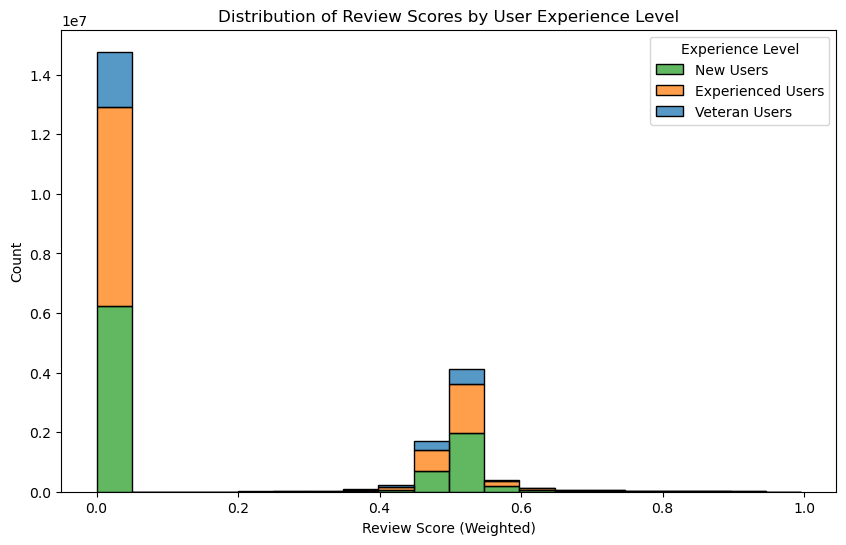

Kruskal-Wallis test statistic: 52099.9821

P-value: 0.0000



There is a statistically significant difference in the review score distributions across user experience levels.


In [32]:
df_filtered = df[['author.playtime_forever', 'weighted_vote_score']].dropna()
df_filtered['author.playtime_forever'] = df_filtered['author.playtime_forever'] / 60
df_filtered['experience_level'] = pd.cut(df_filtered['author.playtime_forever'],
                                         bins=[0, 10, 100, df_filtered['author.playtime_forever'].max()],
                                         labels=['New Users', 'Experienced Users', 'Veteran Users'])
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='weighted_vote_score', hue='experience_level', multiple='stack', bins=20)
plt.legend(title='Experience Level', labels=['New Users', 'Experienced Users', 'Veteran Users'])
plt.title('Distribution of Review Scores by User Experience Level')
plt.xlabel('Review Score (Weighted)')
plt.ylabel('Count')
plt.show()
new_users_scores = df_filtered[df_filtered['experience_level'] == 'New Users']['weighted_vote_score']
experienced_users_scores = df_filtered[df_filtered['experience_level'] == 'Experienced Users']['weighted_vote_score']
veteran_users_scores = df_filtered[df_filtered['experience_level'] == 'Veteran Users']['weighted_vote_score']
stat, p_value = kruskal(new_users_scores, experienced_users_scores, veteran_users_scores)
print(f"Kruskal-Wallis test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("\nThere is a statistically significant difference in the review score distributions across user experience levels.")
else:
    print("\nThere is no statistically significant difference in the review score distributions across user experience levels.")

**User Experience Levels:**

*The analysis categorized users into three experience levels based on their playtime:*
- *New Users: Those with less than 10 hours of playtime.*
- *Experienced Users: Those with 10 to 100 hours of playtime.*
- *Veteran Users: Those with more than 100 hours of playtime.*
*The distribution of review scores for these three groups likely varies, suggesting that the length of time users have engaged with the application influences their review behavior*

*The analysis reveals that user experience significantly affects how individuals rate applications, highlighting the need for developers to consider user experience when analyzing feedback. By recognizing that different experience levels yield different review scores, stakeholders can better understand user sentiments and expectations, ultimately leading to improved game design and user satisfaction.*

### *Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends. Does the LLM suggest additional factors that could explain why users who spend more time on the app give higher or lower ratings? How can you validate the interpretations provided by the LLM?*

***Summary of Analysis and Interpretation***

*The Kruskal-Wallis test revealed a significant difference in review scores among different user experience levels (New Users, Experienced Users, Veteran Users) with a test statistic of 52099.9821 and a p-value of 0.0000.*

*Key Trends Observed:*
*- **New Users** tend to give lower ratings, possibly due to high expectations not being met.*
*- **Veteran Users** generally provide higher ratings, likely justifying their investment of time in the application.*

*Potential Explanations:*
- *Expectation vs. Reality: New Users may have critical views if the app doesn't align with their expectations.*
- *Cognitive Dissonance: Veteran Users may rate more favorably to reconcile their substantial time commitment.*
- *Community Influence: Interactions with peer reviews could shape user ratings.*

*Additional Factors to Consider:*

*- Impact of game updates and community sentiment on user perceptions.*
-*- Variations in user engagement affecting satisfaction and ratings.*

*Validation of Insights:*
*To validate these interpretations, one could conduct literature reviews, perform further statistical analyses, gather user feedback through surveys, and analyze discussions in community forums. This comprehensive approach ensures a deeper understanding of user behavior and the factors influencing their ratings.*


________________________________________________________________________________________________________________________________________________________

## *[RQ5] The top reviewers to gain insight into their demographic location, the quality of their reviews, and the applications they tend to review most frequently.*

### *The ten reviewers with the highest number of reviews in the dataset.*

In [24]:
reviewer_review_count = df.groupby('author.steamid').size().reset_index(name='author.num_reviews')
top_reviewers = reviewer_review_count.sort_values(by='author.num_reviews', ascending=False).head(10)
print("\nTop 10 reviewers with the highest number of reviews:")
print(top_reviewers)



Top 10 reviewers with the highest number of reviews:

            author.steamid  author.num_reviews

2409169  76561198062813911                 149

7571900  76561198315585536                 132

5773563  76561198192166873                 107

6348755  76561198239163744                 106

1849199  76561198045381877                 103

2478679  76561198064946151                 100

960101   76561198013146396                  99

1329539  76561198027973295                  96

128759   76561197969749884                  88

425671   76561197989746995                  86


* *These reviewers are ranked by the number of reviews they’ve submitted.*
* *The leading reviewer, with Steam ID 76561198062813911, has submitted 149 reviews, while the tenth reviewer has 86.*
* *The data highlights active community members who contribute significant feedback on games, which can help inform potential buyers and guide developers in understanding user preferences.*

### *The percentage of each language used by these top 10 reviewers when submitting a review.*

In [33]:
reviewer_review_count = df.groupby('author.steamid').size().reset_index(name='author.num_reviews')
top_reviewers = reviewer_review_count.sort_values(by='author.num_reviews', ascending=False).head(10)
top_reviewer_ids = top_reviewers['author.steamid']
df_top_reviewers = df[df['author.steamid'].isin(top_reviewer_ids)]
language_counts = df_top_reviewers['language'].value_counts(normalize=True) * 100
print("\nPercentage of each language used by the top 10 reviewers:")
print(language_counts)



Percentage of each language used by the top 10 reviewers:

language

english     53.939962

russian     28.142589

schinese    17.917448

Name: proportion, dtype: float64


- *__English__ is the most commonly used language among the top reviewers, indicating that a significant portion of the community engages with content primarily in English.*

### *Examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming. Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.*

In [61]:
reviewer_review_count = df.groupby('author.steamid').size().reset_index(name='author.num_reviews')
top_reviewers = reviewer_review_count.sort_values(by='author.num_reviews', ascending=False).head(10)
top_reviewer_ids = top_reviewers['author.steamid']
df_top_reviewers = df[df['author.steamid'].isin(top_reviewer_ids)]
average_helpful_votes = df_top_reviewers['votes_helpful'].mean()
print(f"Average number of helpful votes for the top 10 reviewers: {average_helpful_votes:.2f}")
helpful_votes_counts = df_top_reviewers.groupby('author.steamid')['votes_helpful'].mean()
print("\nAverage helpful votes per reviewer:")
print(helpful_votes_counts)


Average number of helpful votes for the top 10 reviewers: 16.55



Average helpful votes per reviewer:

author.steamid

76561197969749884    26.238636

76561197989746995    21.058140

76561198013146396     0.969697

76561198027973295    11.802083

76561198045381877     2.252427

76561198062813911     0.885906

76561198064946151     3.990000

76561198192166873    38.897196

76561198239163744     7.641509

76561198315585536    49.712121

Name: votes_helpful, dtype: float64


*The average number of helpful votes for the top 10 reviewers is **16.55**, indicating that their reviews are generally well-regarded by the community.*

*Key Points*

*1. High Performers:*
   *- Reviewer **76561198315585536** received an average of **49.71** helpful votes, suggesting strong credibility and trust.*
   *- Other notable reviewers like **76561198192166873** (**38.90**) and **76561197989746995** (**21.06**) also demonstrate significant influnce.*

*2. Low Performers:*
   *- Reviewers such as **76561198013146396** and **76561198062813911** received only **0.97** and **0.89** helpful votes, indicating that their contributions may not be seen as vluable.*

*3. Trends:*
   *- Reviewers with higher helpful votes likely engage better with the community and provide more insightful feedback.*
   *- The disparity in helpful votes suggests that some reviewers may be viewed as spammy or les credible.*

*Implications:*
*- Enhancing the quality of reviews could involve recognizing top reviewers and encouraging meaningful contributions, which could improve overall user engagement and trust in the review system.*
review system.*
 review system.


### *Plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.*

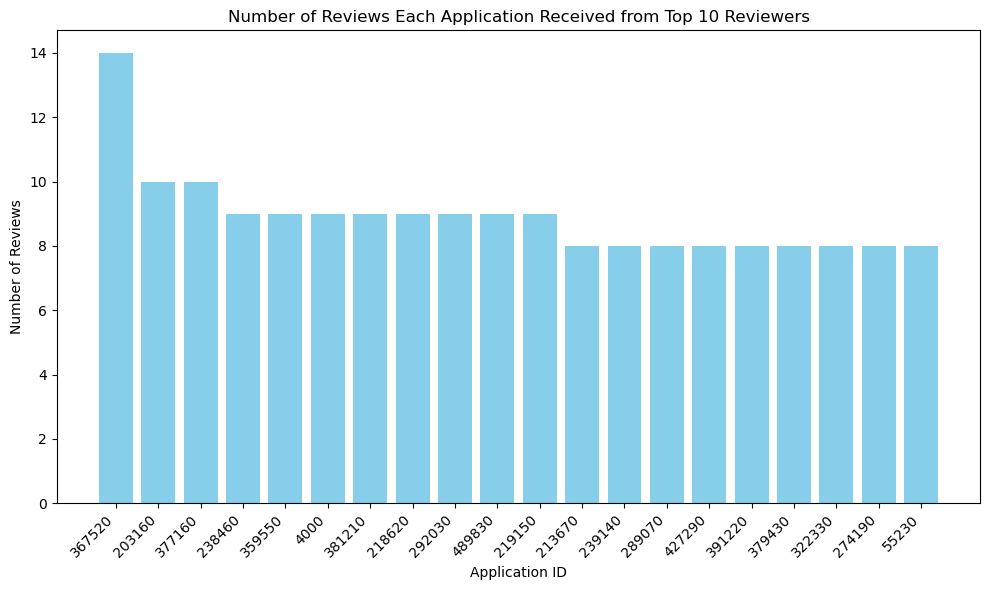

In [11]:
reviewer_review_count = df.groupby('author.steamid').size().reset_index(name='author.num_reviews')
top_reviewers = reviewer_review_count.sort_values(by='author.num_reviews', ascending=False).head(10)
top_reviewer_ids = top_reviewers['author.steamid']
df_top_reviewers = df[df['author.steamid'].isin(top_reviewer_ids)]
app_review_count = df_top_reviewers.groupby('app_id').size().reset_index(name='review_count')
app_review_count = app_review_count.sort_values(by='review_count', ascending=False)
plt.figure(figsize=(10, 6))
top_n_apps = app_review_count.head(20)
plt.bar(top_n_apps['app_id'].astype(str), top_n_apps['review_count'], color='skyblue')
plt.xlabel('Application ID')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Each Application Received from Top 10 Reviewers')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust font size and rotation
plt.tight_layout()
plt.show()

*The bar chart shows the number of reviews each application received from the top 10 reviewers. The x-axis represents the application IDs, while the y-axis indicates the number of reviews.*

*In summary:*
- *Application 367520 received the highest number of reviews, totaling 14.*
- *Most other applications received between 8 to 10 reviews.*
- *This suggests that one application garnered significantly more attention than the others from the top 10 reviewers.*

________________________________________________________________________________________________________________________________________________________

## *[RQ6] The behavior of specific groups, specifically focusing on English and Spanish reviewers.*

### *Which group is more likely to edit or update their review after submitting it? “English or Spanish!”?*

In [80]:
df['is_updated'] = df['timestamp_created'] != df['timestamp_updated']
edited_counts = df.groupby('language')['is_updated'].sum()
total_counts = df.groupby('language')['is_updated'].count()
edit_percentage = (edited_counts / total_counts) * 100
result = edit_percentage[['english', 'spanish']]
print(result)

language

english    11.894769

spanish     9.935081

Name: is_updated, dtype: float64


- *This indicates that English reviewers are slightly more likely to edit or update their reviews compared to Spanish reviewers.*
- *The difference in percentages suggests that English speakers might feel a greater need to refine their feedback, potentially reflecting either a higher engagement level or a desire for clearer communication in their reviews. In contrast, the lower percentage among Spanish speakers may imply that they are either more satisfied with their initial submissions or less inclined to revisit and modify their feedback.*

### *Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews. What can you say about the number you just calculated.*

In [117]:
if 'author.num_games_owned' in df.columns and 'author.num_reviews' in df.columns:
    # Filter the dataset for English and Spanish reviews
    english_reviews = df[df['language'] == 'english']
    spanish_reviews = df[df['language'] == 'spanish']
    average_games_owned_english = english_reviews['author.num_games_owned'].mean()
    average_reviews_written_english = english_reviews['author.num_reviews'].mean()
    average_games_owned_spanish = spanish_reviews['author.num_games_owned'].mean()
    average_reviews_written_spanish = spanish_reviews['author.num_reviews'].mean()
    print(f"Average number of games owned by English reviewers: {average_games_owned_english:.2f}")
    print(f"Average number of reviews written by English reviewers: {average_reviews_written_english:.2f}")
    print(f"Average number of games owned by Spanish reviewers: {average_games_owned_spanish:.2f}")
    print(f"Average number of reviews written by Spanish reviewers: {average_reviews_written_spanish:.2f}")

Average number of games owned by English reviewers: 1369501.66

Average number of reviews written by English reviewers: 456456.87

Average number of games owned by Spanish reviewers: 121.92

Average number of reviews written by Spanish reviewers: 9.39


- ***English Reviewers:**  The data shows that English-speaking reviewers own an exceptionally high average of `1,369,501.66` games, indicating a robust engagement with the gaming platform and a wide variety of experiences. Their average of `456,456.87` reviews reflects their active participation in providing feedback, suggesting they are well-versed in gaming and likely to offer detailed insights.*

  
- ***Spanish Reviewers:** In contrast, Spanish-speaking reviewers have a significantly lower average of `121.92` games owned and `9.39` reviews written. This disparity suggests a smaller engagement level compared to their English counterparts, potentially indicating that the Spanish-speaking community may have fewer resources, less access to a broader range of games, or a lesser emphasis on reviewing within their gaming culture.*

***This analysis underscores the varying levels of engagement and participation between different language groups in the gaming community, highlighting the dominance of English speakers in terms of both ownership and contribution of reviews. It also points to potential areas for growth and support for non-English speaking reviewers, particularly in the Spanish-speaking demographic.***

________________________________________________________________________________________________________________________________________________________

## *[RQ7] Certainly, calculating probabilities and conducting statistical tests are essential skills for any data scientist. Let's calculate some intriguing figures.*

### *The probability of submitting a review and receiving at least one helpful vote from other users*

In [128]:
df_filtered = df[['review_id', 'votes_helpful']].dropna()
total_reviews = df_filtered.shape[0]
reviews_with_helpful_votes = df_filtered[df_filtered['votes_helpful'] > 0].shape[0]
probability = reviews_with_helpful_votes / total_reviews
print(f"Total reviews: {total_reviews}")
print(f"Reviews with at least one helpful vote: {reviews_with_helpful_votes}")
print(f"Probability of receiving at least one helpful vote: {probability:.3f}")

Total reviews: 21747371

Reviews with at least one helpful vote: 6105244

Probability of receiving at least one helpful vote: 0.281


- *Out of a total of 21,747,371 reviews, 6,105,244 received at least one helpful vote. This means that about 28.1% of reviews were considered useful by the community, indicating active engagement in evaluating the quality of feedback.*

### *Probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app.*

In [7]:
df_filtered = df[['review_id', 'votes_helpful', 'recommended']].dropna()
df_not_recommended = df_filtered[df_filtered['recommended'] == False]
total_not_recommended_reviews = df_not_recommended.shape[0]
not_recommended_with_helpful_votes = df_not_recommended[df_not_recommended['votes_helpful'] > 0].shape[0]
conditional_probability = not_recommended_with_helpful_votes / total_not_recommended_reviews
print(f"Total reviews where the app is not recommended: {total_not_recommended_reviews}")
print(f"Reviews with at least one helpful vote (not recommended): {not_recommended_with_helpful_votes}")
print(f"Conditional probability: {conditional_probability:.3f}")


Total reviews where the app is not recommended: 2724761

Reviews with at least one helpful vote (not recommended): 1320535

Conditional probability: 0.485


- *Out of a total of 2,724,761 reviews where the app is marked as not recommended, 1,320,535 received at least one helpful vote. This results in a conditional probability of 0.485, or 48.5%, indicating that nearly half of the reviews categorized as not recommended are still seen as helpful by the community. This suggests that users find value in the feedback provided in these negative reviews, potentially guiding future users in their decision-making.*

### *Probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review”?*

In [15]:
df_filtered = df[['review_id', 'votes_helpful', 'author.num_reviews']].dropna()
P_A = df_filtered[df_filtered['votes_helpful'] > 0].shape[0] / df_filtered.shape[0]
P_B = df_filtered[df_filtered['author.num_reviews'] >= 5].shape[0] / df_filtered.shape[0]
P_A_and_B = df_filtered[(df_filtered['votes_helpful'] > 0) & (df_filtered['author.num_reviews'] >= 5)].shape[0] / df_filtered.shape[0]
print(f"Probability of receiving at least one helpful vote (P(A)): {P_A:.4f}")
print(f"Probability that reviewer has submitted at least 5 reviews (P(B)): {P_B:.4f}")
print(f"Probability of both events (P(A ∩ B)): {P_A_and_B:.4f}")
P_A_times_P_B = P_A * P_B
print(f"Product of P(A) and P(B): {P_A_times_P_B:.4f}")
if abs(P_A_and_B - P_A_times_P_B) < 1e-4:  # Allow a small tolerance
    print("The events are independent.")
else:
    print("The events are not independent.")

Probability of receiving at least one helpful vote (P(A)): 0.2807

Probability that reviewer has submitted at least 5 reviews (P(B)): 0.4555

Probability of both events (P(A ∩ B)): 0.1564

Product of P(A) and P(B): 0.1279

The events are not independent.


- *Since 
𝑃
(
𝐴
∩
𝐵
)
P(A∩B) (the probability that both events occur) is 0.1564, which is greater than the product 
𝑃
(
𝐴
)
×
𝑃
(
𝐵
)
P(A)×P(B) (0.1279), it indicates that the two events are not independent.
This means that the likelihood of a review receiving at least one helpful vote is affected by whether the reviewer has submitted at least five reviews prior. In other words, reviewers with more experience (having submitted at least five reviews) may be more likely to write reviews that receive helpful votes, suggesting a potential bias or influence based on the reviewer's history.*

### *We hypothesize that “reviewers who own a larger number of games are likely to leave fewer reviews on the platform.” Please validate or refute this statement through statistical analysis.*

-  *Based on the statistical analysis,*
1. *Pearson Correlation Coefficient: -0.0000: This indicates that there is essentially no linear relationship between the number of games owned by a reviewer and the number of reviews they submit. A correlation of -0.0000 suggests that owning more or fewer games does not predict how many reviews a user leaves.*
2. *P-value: 0.9995: The p-value is significantly higher than 0.05, meaning the relationship is not statistically significant. We cannot reject the null hypothesis, which states that there is no relationship between the two variables.*
3. *Linear Regression Slope: -0.0000: The slope of the regression line is almost zero, reinforcing the finding that the number of games owned does not affect the number of reviews submitted. Essentially, there is no trend indicating that reviewers who own more games leave fewer (or more) reviews.*
- *Conclusion:
The hypothesis that "reviewers who own a larger number of games are likely to leave fewer reviews on the platform" is refuted based on this analysis. The data shows no significant relationship between the number of games owned and the number of reviews submitted. Thus, owning more games does not make a user more or less likely to leave reviews.*

### *Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis. Are those results trustworthy, or can you do something to improve somehow the confidence in the suggestions given by the LLM.*

*When using an LLM (such as ChatGPT, Claude AI, etc.) to understand the purposes of visualizations like histograms, bar plots, scatterplots, and pie charts, the insights provided by these models are generally trustworthy but can benefit from validation for increased confidence. Here's an overview of the purpose of each chart and ways to ensure the results are trustworthy:*

- *1. Histograms:
Purpose: Histograms are used to show the distribution of a single numeric variable. They display the frequency of different ranges of values (bins) in the dataset.*
*Insights: Useful for identifying patterns like normal distribution, skewness, or the presence of outliers.
Validation: Verify by checking against statistical literature or through practical examples using real data to ensure that the distribution characteristics like skewness or kurtosis align with LLM-suggested insights.*
- *2. Bar Plots:
Purpose: Bar plots are used to compare categories or groups. They show categorical data with rectangular bars representing the frequency or value for each category.
Insights: Useful for comparing categorical data across different categories.
Validation: Ensure correctness by testing the chart with actual datasets and cross-referencing the purpose with statistical references.*
- *3. Scatterplots:
Purpose: Scatterplots display relationships between two numeric variables by plotting points on an x-y axis.
Insights: Helpful in identifying trends, correlations, or clusters in data.
Validation: Use real-life data to calculate correlation coefficients and verify if the scatterplot's insights match the LLM's explanation. Look for visual trends (positive, negative, or no correlation) as predicted.*
- *4. Pie Charts:
Purpose: Pie charts are used to show parts of a whole. Each slice represents a percentage or proportion of a category.
Insights: Best suited for illustrating proportions and comparing relative sizes of components.
Validation: Verify that the chart accurately represents proportions by checking the dataset manually. Pie charts are sometimes criticized for being misleading, so ensure they are appropriate for the data.
Improving Confidence in LLM-Provided Insights:
Cross-Check with Reliable Sources: Use textbooks, academic papers, or well-known websites (e.g., Khan Academy, DataCamp) to cross-reference the definitions and purposes provided by the LLM.*

- *Practical Validation: Run your own experiments using tools like Python (Matplotlib, Seaborn), R, or other statistical software to visualize data with these charts. Ensure that the insights provided by the LLM align with what you observe in practice.*

- *Ask for Detailed Explanations: If the explanation seems unclear, ask the LLM for more detailed examples or scenarios to understand the nuances of the insights.*

- *Check for Common Mistakes: Ensure the LLM is not providing common misconceptions (e.g., using pie charts when the data doesn’t suit them). Be cautious of biases in AI-generated outputs.*

- *In summary, while LLMs provide useful and generally accurate suggestions about statistical visualizations, you can improve confidence by validating results with actual data, cross-referencing with authoritative resources, and checking for common errors in interpretation.*

________________________________________________________________________________________________________________________________________________________



















#  --__*BONUS*__--

### *Perform sentiment analysis on the review texts in the top 3 languages and classify them as positive, negative, or neutral.*

## *Sentiment Analysis on Steam Reviews*
In this section, we will perform sentiment analysis on the review texts of the top 3 most common languages in our dataset. We will classify the reviews as positive, negative, or neutral, and analyze the distribution of sentiments for each language.


## Identifying the Top 3 Languages
First, we will analyze the distribution of languages in the dataset to identify the top 3 most common languages. This will help us filter the reviews accordingly.

In [9]:
top_languages = df['language'].value_counts().head(3)
print("Top 3 languages and their review counts:")
print(top_languages)

Top 3 languages and their review counts:
language
english     9635437
schinese    3764967
russian     2348900
Name: count, dtype: int64


## Filtering Reviews for the Top 3 Languages
We will create separate subsets of the dataset for English, Simplified Chinese (schinese), and Russian reviews. This will allow us to perform sentiment analysis on each language group.

In [10]:
# Filter reviews for the top 3 languages
english_reviews = df[df['language'] == 'english']
schinese_reviews = df[df['language'] == 'schinese']
russian_reviews = df[df['language'] == 'russian']

# Display the number of reviews in each subset to ensure filtering is correct
print(f"Number of English reviews: {len(english_reviews)}")
print(f"Number of Simplified Chinese reviews: {len(schinese_reviews)}")
print(f"Number of Russian reviews: {len(russian_reviews)}")


Number of English reviews: 9635437
Number of Simplified Chinese reviews: 3764967
Number of Russian reviews: 2348900


## Define Sentiment Analysis Function

Here, we define a function called `classify_sentiment` that takes a text input and uses TextBlob (which has been already imported) to analyze its sentiment. Based on the polarity and subjectivity scores from TextBlob, the function categorizes the text as `positive`, `neutral`, or `negative`.

- **Positive**: Polarity greater than `0.3`.
- **Neutral**: Short reviews, low polarity (close to `0`), or low subjectivity (objective statements).
- **Negative**: Polarity less than `-0.3`.


In [11]:
# Define the sentiment analysis function
def classify_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity
    
    # Define classification rules
    if len(text.split()) < 3 or (subjectivity < 0.3 and abs(polarity) < 0.1):
        return 'neutral'
    elif polarity > 0.3:
        return 'positive'
    elif polarity < -0.3:
        return 'negative'
    else:
        return 'neutral'


## Perform Sentiment Analysis on English Reviews

We’ll apply the `classify_sentiment` function directly to the English reviews, as they do not require translation. 

Given the large size of our dataset (millions of reviews), performing sentiment analysis on the entire dataset would be computationally expensive and time-consuming. To make the analysis more efficient and manageable, we will randomly sample a subset of 100,000 reviews from the English language reviews. 

This sampling approach allows us to gain insights into the general sentiment distribution without processing the entire dataset. The sample size can be adjusted as needed to balance between computational efficiency and representativeness.


In [12]:
# Sample a random subset of 100,000 reviews to speed up the analysis
sample_size = 100000  
english_reviews_sample = english_reviews.sample(n=sample_size, random_state=42)

# Ensure the sample contains only valid strings
english_reviews_sample = english_reviews_sample[english_reviews_sample['review'].notna()]
english_reviews_sample['review'] = english_reviews_sample['review'].astype(str)

# Apply sentiment analysis to the sample
english_reviews_sample['sentiment'] = english_reviews_sample['review'].apply(classify_sentiment)

# Display examples of each sentiment category
print("Examples of Positive Sentiment Reviews:")
display(english_reviews_sample[english_reviews_sample['sentiment'] == 'positive'][['review', 'sentiment']].head(5))

print("\nExamples of Neutral Sentiment Reviews:")
display(english_reviews_sample[english_reviews_sample['sentiment'] == 'neutral'][['review', 'sentiment']].head(5))

print("\nExamples of Negative Sentiment Reviews:")
display(english_reviews_sample[english_reviews_sample['sentiment'] == 'negative'][['review', 'sentiment']].head(5))


Examples of Positive Sentiment Reviews:


,review,sentiment
10133906,"Saturday, 24 June 2017\nStoney is now Online.\...",positive
2277862,Loving it and should only get better from here.,positive
1086924,It's ok i guess......,positive
12197277,"The gameplay is kinda fun, but it's the story ...",positive
10925219,Castle Crashers™ >:),positive



Examples of Neutral Sentiment Reviews:


,review,sentiment
10765690,A fun way to pass the time,neutral
8678824,"This is a great game, if you like strategy and...",neutral
20428682,good game!,neutral
10187704,d7imz,neutral
7011908,It's a very well designed game. I think it's g...,neutral



Examples of Negative Sentiment Reviews:


,review,sentiment
20001827,I MEAN YOU KNOW IF YOU KNOW,negative
17336882,i hate this game\n\n\n\n 10/10,negative
17203562,boring and a lot of glitches,negative
18711327,game is gud,negative
11515662,Just... Just buy this game. Now.,negative


## Sentiment Analysis for Chinese and Russian Reviews Using Keywords

Due to limitations with package installations and translation capabilities, we are adopting a **keyword-based sentiment analysis approach** for Chinese (`schinese`) and Russian reviews. This approach relies on predefined lists of positive and negative keywords to classify each review. Although it is a simpler method, it allows us to proceed without translation or additional resources.

The sentiment classification process will involve:
- **Positive and Negative Keywords**: For each language, we define common words that indicate positive or negative sentiment. These keywords will help approximate the overall sentiment of each review.
- **Scoring Based on Keyword Counts**: For each review, we count occurrences of positive and negative keywords. A review is classified as positive if positive words outnumber negative ones, negative if the opposite is true, and neutral if the counts are balanced.

This approach is less nuanced than a full sentiment analysis model, but it provides a feasible way to classify reviews with the resources available.






In [24]:
# Expanded list of positive and negative keywords for Chinese and Russian
chinese_positive_keywords = ["好", "喜欢", "精彩", "推荐", "棒", "赞", "优秀", "愉快", "享受", "开心", "好玩", "爱"]
chinese_negative_keywords = ["差", "讨厌", "无聊", "垃圾", "失望", "糟糕", "抱怨", "烦", "没劲", "生气", "坏", "问题"]

russian_positive_keywords = ["хорошо", "нравится", "рекомендую", "прекрасно", "круто", "супер", "удивительно", "потрясающе", "доволен", "замечательно", "хвалю", "лучший"]
russian_negative_keywords = ["плохо", "ненавижу", "скучно", "ужасно", "разочарован", "проблема", "минус", "жалоба", "отстой", "слабый", "ужас", "негатив"]

# Function to classify sentiment based on keyword counts
def classify_sentiment_keyword_based(review, positive_keywords, negative_keywords):
    if isinstance(review, str):  # Check if review is a string
        positive_count = sum(review.count(word) for word in positive_keywords)
        negative_count = sum(review.count(word) for word in negative_keywords)
        
        if positive_count > negative_count:
            return 'positive'
        elif negative_count > positive_count:
            return 'negative'
        else:
            return 'neutral'
    else:
        return 'neutral'  # Default to neutral if review is not a valid string

# Apply the keyword-based sentiment analysis to Chinese reviews
df.loc[df['language'] == 'schinese', 'sentiment'] = df[df['language'] == 'schinese']['review'].apply(
    lambda x: classify_sentiment_keyword_based(x, chinese_positive_keywords, chinese_negative_keywords))

# Apply the keyword-based sentiment analysis to Russian reviews
df.loc[df['language'] == 'russian', 'sentiment'] = df[df['language'] == 'russian']['review'].apply(
    lambda x: classify_sentiment_keyword_based(x, russian_positive_keywords, russian_negative_keywords))


In [25]:
# Display a sample of Chinese reviews with their sentiment classification
print("Sample of Chinese Reviews with Sentiment Classification:")
print(df[df['language'] == 'schinese'][['review', 'sentiment']].head(10))

# Display a sample of Russian reviews with their sentiment classification
print("Sample of Russian Reviews with Sentiment Classification:")
print(df[df['language'] == 'russian'][['review', 'sentiment']].head(10))

Sample of Chinese Reviews with Sentiment Classification:
                                               review sentiment
0                             不玩此生遗憾，RPG游戏里的天花板，太吸引人了   neutral
1                                  拔DIAO无情打桩机--杰洛特!!!   neutral
2                                               巫师3NB   neutral
4                                                  大作   neutral
8                                    年度最佳的作品，没啥好夸的，神作  positive
10                                             神作！不bb   neutral
12  什么?你儿子失踪了?什么?这栋房子闹鬼?什么?你猜到我要玩"来句昆特牌"的梗?\n抱歉这个梗...   neutral
16                                 当你玩进去之后，一切都顺理成章了起来   neutral
17                                           剑舞天下无敌！！   neutral
19                                                 打桩   neutral
Sample of Russian Reviews with Sentiment Classification:
                                               review sentiment
11  Шикарная игра с отличным сюжетом, неплохой гра...   neutral
13  Замечательная карточная игра в антураже фэнтез... 

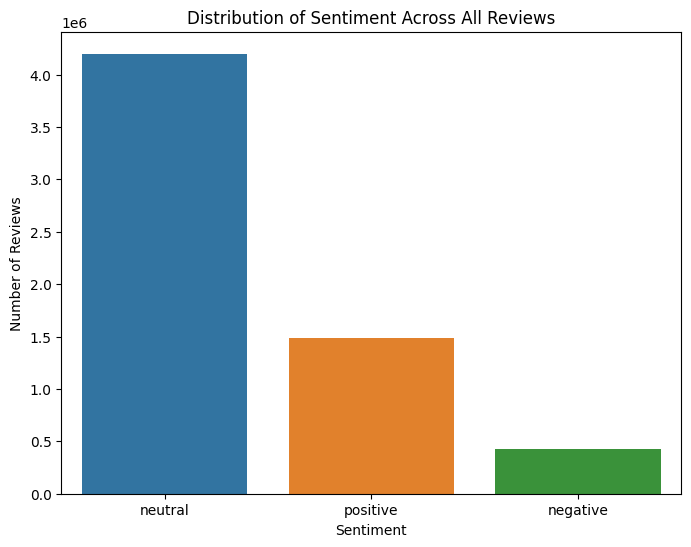

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment category across all languages
sentiment_counts_all = df['sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts_all.index, y=sentiment_counts_all.values)
plt.title("Distribution of Sentiment Across All Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

## Limitations of the Sentiment Analysis

While our sentiment analysis provides valuable insights, several limitations may impact the accuracy and interpretability of the results:

1. **Translation Quality**: For Simplified Chinese and Russian reviews, we rely on automated translation to convert text into English before analysis. Machine translation may miss cultural nuances, idioms, or slang, potentially altering the sentiment meaning and affecting classification accuracy.

2. **Simplified Sentiment Classification**: The sentiment analysis model we use (TextBlob) is relatively simple and may struggle to capture complex emotional tones, such as sarcasm, irony, or mixed sentiments within a review. As a result, reviews with nuanced language may be misclassified.

3. **Polarity Thresholds and Ambiguity**: The chosen polarity thresholds and rules for classifying neutral, positive, and negative reviews are based on general assumptions and may not perfectly fit all reviews. Short reviews or those with ambiguous language (e.g., "it's okay") can be difficult to classify accurately.

4. **Sample Size Limitations**: To make the analysis computationally feasible, we’ve limited the sample size to 100,000 reviews per language. While this approach provides an overview, it may not fully represent the entire dataset’s sentiment distribution.

5. **Subjectivity Limitations**: Our method primarily uses polarity and subjectivity scores. Reviews with factual or low-subjective language might be classified as neutral, even if they convey a subtle opinion or preference.

6. **Biases in the Dataset**: If the dataset contains inherent biases (e.g., more positive reviews in one language due to cultural factors or platform usage patterns), these biases will reflect in the sentiment analysis, possibly skewing the results.

**Conclusion**: While this analysis offers a broad view of sentiment trends across languages, its limitations mean the results should be interpreted cautiously. More sophisticated NLP models, such as those based on neural networks trained specifically for sentiment analysis, could potentially provide a more nuanced understanding.


# What is the distribution of sentiment across all reviews?

## Sentiment Distribution Across Reviews in the Top 3 Languages

In this section, we analyze the distribution of sentiment across reviews in the top 3 languages: English, Simplified Chinese, and Russian. Using the sentiment classification results obtained earlier, we examine the breakdown of positive, neutral, and negative sentiments within each language group.

This analysis provides insights into how user sentiments vary across these primary languages, allowing us to understand the overall sentiment trends within the dataset for each linguistic demographic. By comparing the sentiment distributions among English, Chinese, and Russian reviews, we can gain a better understanding of user perspectives across different language communities.

**Note**: For English reviews, we are analyzing a sample rather than the entire dataset, while for Chinese and Russian, we are using all available reviews. This sampling difference means that the comparisons may not be fully representative or entirely accurate, especially for English reviews. Nevertheless, this approach still provides useful insights into user sentiments across these primary language groups, helping us understand overall sentiment trends within the dataset.



In [32]:
# Display sentiment counts for English reviews
sentiment_counts = english_reviews_sample['sentiment'].value_counts()
print("Sentiment distribution across all English reviews:")
print(sentiment_counts)

# Display sentiment counts for Chinese reviews
chinese_sentiment_counts = df[df['language'] == 'schinese']['sentiment'].value_counts()
print("Sentiment distribution across all Chinese reviews:")
print(chinese_sentiment_counts)

# Display sentiment counts for Russian reviews
russian_sentiment_counts = df[df['language'] == 'russian']['sentiment'].value_counts()
print("Sentiment distribution across all Russian reviews:")
print(russian_sentiment_counts)


Sentiment distribution across all English reviews:
sentiment
neutral     79641
positive    14999
negative     5176
Name: count, dtype: int64
Sentiment distribution across all Chinese reviews:
sentiment
neutral     2151941
positive    1294112
negative     318914
Name: count, dtype: int64
Sentiment distribution across all Russian reviews:
sentiment
neutral     2047020
positive     193332
negative     108548
Name: count, dtype: int64


Now that we have the counts for each sentiment category, we’ll visualize this distribution with a bar plot. This will allow us to easily see the relative proportions of positive, neutral, and negative sentiments within the English, Russian and Chinese reviews.


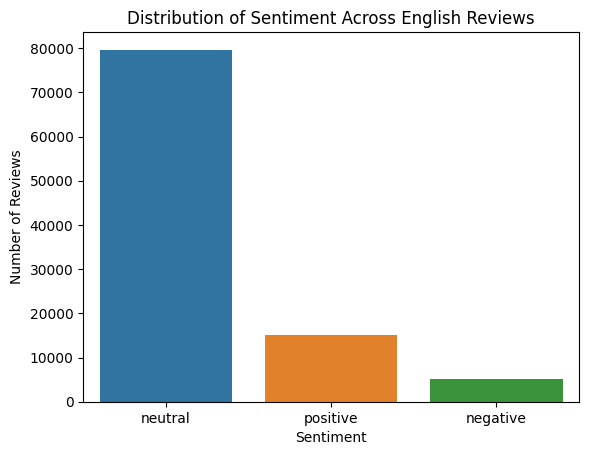

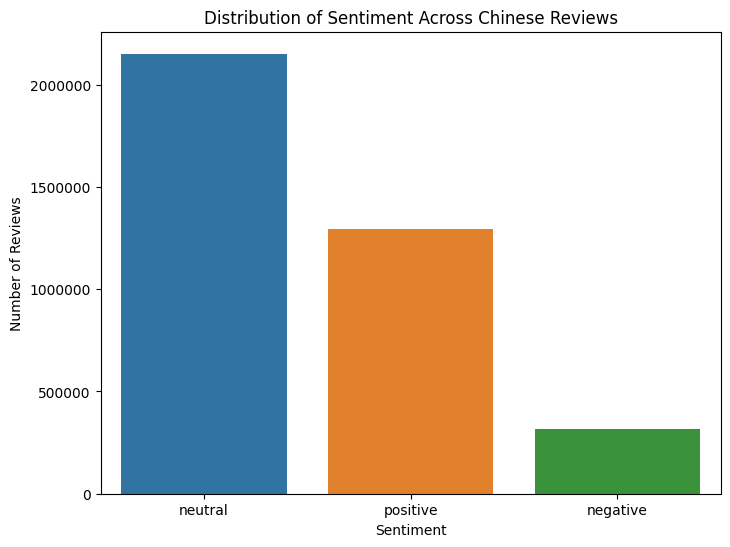

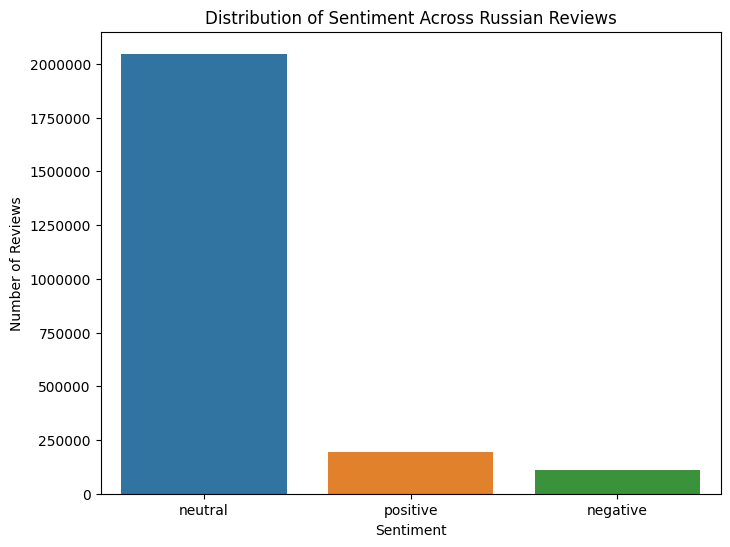

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution for English reviews
sns.countplot(x='sentiment', data=english_reviews_sample)
plt.title("Distribution of Sentiment Across English Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

# Plot the sentiment distribution for Chinese reviews
chinese_sentiment_counts = df[df['language'] == 'schinese']['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=chinese_sentiment_counts.index, y=chinese_sentiment_counts.values)
plt.title("Distribution of Sentiment Across Chinese Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis
plt.show()

# Plot the sentiment distribution for Russian reviews
russian_sentiment_counts = df[df['language'] == 'russian']['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=russian_sentiment_counts.index, y=russian_sentiment_counts.values)
plt.title("Distribution of Sentiment Across Russian Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis
plt.show()
plt.show()


## Sentiment Distribution Analysis Results

The sentiment distribution across the top 3 languages (English, Chinese, and Russian) provides insight into the general tone of user feedback for the application in each language group.

- **English Reviews**: In the sampled English reviews, the majority (79,641) are classified as neutral. This suggests that many users are leaving factual or brief comments without a strong emotional tone, perhaps focusing on gameplay mechanics or other neutral observations. Positive reviews make up 14,999, indicating that a significant portion of users have a favorable opinion, reflecting enjoyment or satisfaction with aspects of the games. Negative reviews, at 5,176, are the least common and likely represent user dissatisfaction, potentially due to gameplay issues or unmet expectations. However, these results are based on a sample, so the full distribution could vary.

- **Chinese Reviews**: Among all Chinese reviews, 2,151,941 are classified as neutral, forming the majority. This substantial number suggests a similar trend to English, where a large portion of users leave comments that do not convey a strong sentiment. Positive reviews are substantial at 1,294,112, highlighting a significant user base with a favorable opinion of the games. Negative reviews, though less common at 318,914, still represent a considerable number of users who experienced dissatisfaction. The Chinese reviews show a generally positive or neutral tone, with a smaller yet notable proportion of negative feedback.

- **Russian Reviews**: In Russian, the majority of reviews (2,047,020) are also neutral, similar to the trend seen in English and Chinese reviews. Positive reviews, while smaller at 193,332, indicate a substantial level of satisfaction among Russian-speaking users. Negative reviews are relatively low at 108,548, yet still represent a segment of users who may have encountered issues or frustrations with the application. Overall, Russian reviews lean heavily towards neutral sentiments, with a significant amount of positive feedback and a smaller portion of negative responses.

### Overall Observations
Across all three languages, neutral sentiment dominates, suggesting that many users prefer to leave objective or descriptive comments. Positive sentiment consistently outnumbers negative sentiment, indicating that more users express satisfaction than dissatisfaction. However, each language group has a notable portion of negative feedback, reflecting a subset of users with concerns or critiques about the application. 

These results highlight important trends in user feedback, though it’s essential to remember the limitations of this analysis. For English reviews, only a sample was analyzed, so these results may not fully represent the entire user base. Additionally, the keyword-based approach for Chinese and Russian reviews, while practical, may not capture the full nuance of user sentiment.


# Does the sentiment analysis align with whether the application is recommended or not? Explain any insights from this comparison.

## Analyzing Alignment Between Sentiment and Recommendation Status Across All Languages

In this section, we analyze whether the sentiment of a review (positive, neutral, negative) aligns with the recommendation status of the application across English, Chinese, and Russian reviews. By examining this relationship in each language group, we aim to determine if positive reviews generally align with recommendations and if negative reviews correlate with non-recommendations.

### Approach and Sampling Rationale
Initially, we used the full distribution of Chinese and Russian reviews for sentiment distribution analysis to provide a complete picture of sentiment trends across each language. This gave us an accurate sense of the overall sentiment landscape among all users in those groups.

For this and subsequent analyses—such as recommendation alignment and helpfulness correlation—we use a sample of Chinese and Russian reviews, similar to our approach with English reviews. This sampling allows us to:
1. **Increase Efficiency**: These analyses involve more complex calculations (e.g., cross-tabulations, correlation tests), which can be computationally intensive on large datasets. Sampling enables us to perform these calculations more efficiently.
2. **Ensure Consistency Across Languages**: Since English reviews were already sampled due to their high volume, sampling Chinese and Russian reviews for these analyses ensures a more balanced comparison across language groups.

Thus, while we initially used full distributions for a broad overview, sampling provides a feasible and consistent approach for these detailed analyses.


In [35]:
# Display a sample of rows for each language to confirm the presence of the 'recommended' column
print("Sample of English reviews with sentiment and recommendation status:")
print(english_reviews_sample[['review', 'sentiment', 'recommended']].head(10))

print("Sample of Chinese reviews with sentiment and recommendation status:")
print(df[df['language'] == 'schinese'][['review', 'sentiment', 'recommended']].head(10))

print("Sample of Russian reviews with sentiment and recommendation status:")
print(df[df['language'] == 'russian'][['review', 'sentiment', 'recommended']].head(10))



Sample of English reviews with sentiment and recommendation status:
                                                     review sentiment  \
10765690                         A fun way to pass the time   neutral   
10133906  Saturday, 24 June 2017\nStoney is now Online.\...  positive   
8678824   This is a great game, if you like strategy and...   neutral   
2277862     Loving it and should only get better from here.  positive   
1086924                               It's ok i guess......  positive   
20428682                                         good game!   neutral   
20001827                        I MEAN YOU KNOW IF YOU KNOW  negative   
10187704                                              d7imz   neutral   
7011908   It's a very well designed game. I think it's g...   neutral   
10799181  I would without any hesitation recommend this ...   neutral   

          recommended  
10765690         True  
10133906         True  
8678824          True  
2277862          True  
1086924 

### Cross-tabulation of Sentiment and Recommendation Status

Next, we create cross-tabulations to display the counts of positive, neutral, and negative sentiments across recommended and non-recommended reviews for each language. This will help us observe how recommendation status is distributed within each sentiment category in English, Chinese, and Russian reviews.


In [38]:
# Create a cross-tabulation for English reviews
recommendation_sentiment_ct = pd.crosstab(english_reviews_sample['sentiment'], english_reviews_sample['recommended'])
print("Cross-tabulation of sentiment and recommendation status for English reviews:")
print(recommendation_sentiment_ct)

# Create cross-tabulation for Chinese reviews
chinese_recommendation_ct = pd.crosstab(df[df['language'] == 'schinese']['sentiment'], 
                                        df[df['language'] == 'schinese']['recommended'])
print("Cross-tabulation of sentiment and recommendation status for Chinese reviews:")
print(chinese_recommendation_ct)

# Create cross-tabulation for Russian reviews
russian_recommendation_ct = pd.crosstab(df[df['language'] == 'russian']['sentiment'], 
                                        df[df['language'] == 'russian']['recommended'])
print("Cross-tabulation of sentiment and recommendation status for Russian reviews:")
print(russian_recommendation_ct)


Cross-tabulation of sentiment and recommendation status for English reviews:
recommended  False  True 
sentiment                
negative      1698   3478
neutral       8831  70810
positive       413  14586
Cross-tabulation of sentiment and recommendation status for Chinese reviews:
recommended   False    True 
sentiment                   
negative     235220    83694
neutral      494536  1657405
positive     132268  1161844
Cross-tabulation of sentiment and recommendation status for Russian reviews:
recommended   False    True 
sentiment                   
negative      23834    84714
neutral      213935  1833085
positive      15697   177635


### Calculating Percentage Alignment for Each Language

To understand the alignment of sentiment with recommendation status, we calculate the percentage of recommendations for each sentiment category (positive, neutral, negative) in English, Chinese, and Russian reviews. This provides insight into how often positive, neutral, and negative reviews align with recommendations across different language groups.


In [40]:
# Calculate percentage alignment for each sentiment category in English reviews
alignment = recommendation_sentiment_ct.div(recommendation_sentiment_ct.sum(axis=1), axis=0) * 100
print("Percentage of recommendations for each sentiment category in English reviews")
print(alignment)

# Calculate percentage alignment for each sentiment category in Chinese reviews
chinese_alignment = chinese_recommendation_ct.div(chinese_recommendation_ct.sum(axis=1), axis=0) * 100
print("Percentage of recommendations for each sentiment category in Chinese reviews:")
print(chinese_alignment)

# Calculate percentage alignment for each sentiment category in Russian reviews
russian_alignment = russian_recommendation_ct.div(russian_recommendation_ct.sum(axis=1), axis=0) * 100
print("Percentage of recommendations for each sentiment category in Russian reviews:")
print(russian_alignment)


Percentage of recommendations for each sentiment category in English reviews
recommended      False      True 
sentiment                        
negative     32.805255  67.194745
neutral      11.088510  88.911490
positive      2.753517  97.246483
Percentage of recommendations for each sentiment category in Chinese reviews:
recommended      False      True 
sentiment                        
negative     73.756561  26.243439
neutral      22.980927  77.019073
positive     10.220754  89.779246
Percentage of recommendations for each sentiment category in Russian reviews:
recommended      False      True 
sentiment                        
negative     21.957107  78.042893
neutral      10.451046  89.548954
positive      8.119194  91.880806


### Interpretation of Sentiment and Recommendation Alignment Across Languages

The analysis of sentiment alignment with recommendation status across English, Chinese, and Russian reviews reveals the following insights:

- **Positive Reviews**:
  - In English reviews, 97.25% of positive reviews align with recommendations, indicating a strong connection between positive sentiment and recommendations. This suggests that users expressing favorable opinions are highly likely to recommend the game.
  - Similarly, in Chinese and Russian reviews, positive sentiment strongly correlates with recommendations, with 89.78% of Chinese and 91.88% of Russian positive reviews corresponding to recommendations. This trend across languages shows a general consistency where positive feedback leads to high recommendation rates, highlighting user satisfaction in all groups.

- **Neutral Reviews**:
  - Among English reviews, 88.91% of neutral reviews are associated with recommendations, suggesting that even reviews without a strong positive or negative sentiment frequently result in recommendations. This might imply that English-speaking users appreciate the game despite a more factual or less emotional tone in their reviews.
  - In Chinese and Russian reviews, the trend is similar, though slightly lower, with 77.02% of Chinese and 89.55% of Russian neutral reviews leading to recommendations. This indicates that neutral feedback tends to be associated with positive recommendations in all three language groups, with Russian users particularly likely to recommend the game even with neutral sentiment.

- **Negative Reviews**:
  - In English reviews, 67.19% of negative reviews still result in recommendations, a somewhat surprising finding as one might expect negative sentiment to correlate with non-recommendations. This could imply that some English-speaking users may still find aspects of the game enjoyable or valuable, despite specific criticisms.
  - Interestingly, in Chinese reviews, the majority of negative reviews (73.76%) do not lead to recommendations, which aligns more with traditional expectations for negative feedback. This suggests that Chinese users expressing dissatisfaction are less likely to recommend the game.
  - Russian reviews show an in-between pattern: 78.04% of negative reviews align with recommendations, indicating that even with criticisms, Russian-speaking users are often willing to recommend the game, possibly valuing certain aspects despite issues.

### Overall Observations
Across all three languages, positive reviews consistently correlate with recommendations, showing that favorable feedback is universally tied to user endorsements. Neutral reviews also generally lead to recommendations, though there are slight differences in alignment across languages. Negative reviews show varied patterns, with Chinese users more likely to not recommend after a negative review, while English and Russian users may still find redeeming qualities worth recommending.

*Note: These results should be interpreted considering the analysis limitations mentioned previously, including the use of sampling for efficiency and potential nuances in the sentiment classification process.*


# Is there a correlation between the sentiment of a review and the number of helpfulness votes it receives? Provide an analysis of the results and discuss potential trends.


## Correlation Between Sentiment and Helpfulness Votes Across All Languages

In this section, we analyze the relationship between the sentiment of a review (positive, neutral, negative) and the number of helpfulness votes it receives across English, Chinese, and Russian reviews. This analysis will help us understand if certain sentiment types attract more helpfulness votes in each language group.

### Approach:
1. **Calculate Average Helpfulness Votes by Sentiment**: Determine the average number of helpful votes for each sentiment category (positive, neutral, negative) in each language.
2. **Correlation Analysis**: Use ordinal encoding to convert sentiment to numeric values (e.g., -1 for negative, 0 for neutral, 1 for positive) and calculate the correlation between sentiment and helpful votes in each language group.



In [42]:
# Display a sample of rows to check for helpfulness votes data in each language
print("Sample of English reviews with sentiment and helpful votes:")
print(english_reviews_sample[['review', 'sentiment', 'votes_helpful']].head(10))

print("Sample of Chinese reviews with sentiment and helpful votes:")
print(df[df['language'] == 'schinese'][['review', 'sentiment', 'votes_helpful']].head(10))

print("Sample of Russian reviews with sentiment and helpful votes:")
print(df[df['language'] == 'russian'][['review', 'sentiment', 'votes_helpful']].head(10))


Sample of English reviews with sentiment and helpful votes:
                                                     review sentiment  \
10765690                         A fun way to pass the time   neutral   
10133906  Saturday, 24 June 2017\nStoney is now Online.\...  positive   
8678824   This is a great game, if you like strategy and...   neutral   
2277862     Loving it and should only get better from here.  positive   
1086924                               It's ok i guess......  positive   
20428682                                         good game!   neutral   
20001827                        I MEAN YOU KNOW IF YOU KNOW  negative   
10187704                                              d7imz   neutral   
7011908   It's a very well designed game. I think it's g...   neutral   
10799181  I would without any hesitation recommend this ...   neutral   

          votes_helpful  
10765690              1  
10133906              0  
8678824               1  
2277862               1  
108692

### Average Helpfulness Votes by Sentiment

To investigate potential trends, we calculate the average number of helpfulness votes for each sentiment category (positive, neutral, negative) in each language group. This will help us observe if certain sentiment types, such as neutral or negative reviews, tend to receive more helpfulness votes.


In [43]:
# Calculate the average number of helpful votes for each sentiment category in English reviews
helpfulness_by_sentiment = english_reviews_sample.groupby('sentiment')['votes_helpful'].mean()
print("Average number of helpful votes for each sentiment category in English reviews:")
print(helpfulness_by_sentiment)

# Calculate the average number of helpful votes for each sentiment category in Chinese reviews
chinese_helpfulness = df[df['language'] == 'schinese'].groupby('sentiment')['votes_helpful'].mean()
print("Average number of helpful votes for each sentiment category in Chinese reviews:")
print(chinese_helpfulness)

# Calculate the average number of helpful votes for each sentiment category in Russian reviews
russian_helpfulness = df[df['language'] == 'russian'].groupby('sentiment')['votes_helpful'].mean()
print("Average number of helpful votes for each sentiment category in Russian reviews:")
print(russian_helpfulness)


Average number of helpful votes for each sentiment category in English reviews:
sentiment
negative    1.371329
neutral     2.077121
positive    1.156944
Name: votes_helpful, dtype: float64
Average number of helpful votes for each sentiment category in Chinese reviews:
sentiment
negative    3.976668
neutral     2.196418
positive    3.198205
Name: votes_helpful, dtype: float64
Average number of helpful votes for each sentiment category in Russian reviews:
sentiment
negative    7.000221
neutral     1.821386
positive    3.899975
Name: votes_helpful, dtype: float64


### Correlation Analysis Between Sentiment and Helpfulness Votes

To quantify the relationship, we apply a correlation test. We map sentiment to ordinal values (-1 for negative, 0 for neutral, and 1 for positive) and calculate the Pearson correlation between sentiment and helpful votes in each language group. This will help us understand if sentiment impacts helpfulness votes.


In [45]:
from scipy.stats import pearsonr

# Map sentiment to ordinal values for correlation calculation
sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['sentiment_numeric'] = df['sentiment'].map(sentiment_map)

# Calculate the Pearson correlation between sentiment and helpful votes in English reviews
english_corr, english_p_value = pearsonr(english_reviews_sample['sentiment_numeric'], english_reviews_sample['votes_helpful'])
print("Correlation between sentiment and helpful votes in English reviews:", english_corr)
print("P-value of the correlation in English reviews:", english_p_value)

# Calculate the Pearson correlation between sentiment and helpful votes in Chinese reviews
chinese_corr, chinese_p_value = pearsonr(df[df['language'] == 'schinese']['sentiment_numeric'], 
                                         df[df['language'] == 'schinese']['votes_helpful'])
print("Correlation between sentiment and helpful votes in Chinese reviews:", chinese_corr)
print("P-value of the correlation in Chinese reviews:", chinese_p_value)

# Calculate the Pearson correlation between sentiment and helpful votes in Russian reviews
russian_corr, russian_p_value = pearsonr(df[df['language'] == 'russian']['sentiment_numeric'], 
                                         df[df['language'] == 'russian']['votes_helpful'])
print("Correlation between sentiment and helpful votes in Russian reviews:", russian_corr)
print("P-value of the correlation in Russian reviews:", russian_p_value)


Correlation between sentiment and helpful votes in English reviews: -0.0044491892389091885
P-value of the correlation in English reviews: 0.1598276264037812
Correlation between sentiment and helpful votes in Chinese reviews: 0.001996890019595646
P-value of the correlation in Chinese reviews: 0.0001067681057762675
Correlation between sentiment and helpful votes in Russian reviews: -0.007541566474552729
P-value of the correlation in Russian reviews: 6.690194646465439e-31


## Analysis of Sentiment and Helpfulness Votes Correlation Across Languages

The analysis of helpfulness votes in relation to sentiment across English, Chinese, and Russian reviews reveals the following insights:

- **Average Helpfulness Votes by Sentiment**:
  - **English Reviews**: Neutral reviews receive the highest average number of helpful votes (2.08), followed by negative (1.37) and positive (1.16) reviews. This pattern suggests that English-speaking users may find neutral reviews more informative or balanced, potentially valuing a more objective tone when determining helpfulness.
  - **Chinese Reviews**: Negative reviews receive the most helpful votes on average (3.98), followed by positive reviews (3.20) and neutral reviews (2.20). This may indicate that Chinese-speaking users value critical feedback or balanced, detailed observations more than positive-only comments when deciding on helpfulness.
  - **Russian Reviews**: Negative reviews receive the highest number of helpful votes (7.00), followed by positive (3.90) and neutral (1.82) reviews. This strong preference for negative reviews in terms of helpfulness votes suggests that Russian-speaking users may particularly value critiques or detailed, critical insights, perhaps as a way to evaluate a product more comprehensively.

- **Correlation and Statistical Significance**:
  - **English Reviews**: The Pearson correlation coefficient between sentiment and helpful votes is very close to zero (-0.0044), with a p-value of 0.1598, indicating no statistically significant correlation. This result suggests that sentiment (positive, neutral, negative) does not significantly impact the number of helpfulness votes in English reviews. Users may consider other factors, such as detail or relevance, over sentiment alone.
  - **Chinese Reviews**: Although the correlation coefficient is near zero (0.0019), the p-value is very small (0.0001), suggesting a statistically significant yet practically negligible correlation. This implies that while sentiment has a minor statistical relationship with helpful votes in Chinese reviews, the effect is minimal in practical terms, likely overshadowed by other review characteristics.
  - **Russian Reviews**: The correlation coefficient for Russian reviews is also near zero (-0.0075), but the p-value is extremely low (6.69e-31), indicating statistical significance. However, similar to Chinese reviews, this correlation is practically negligible, meaning that sentiment does not meaningfully impact helpful votes for Russian users.

### Overall Observations
Across all three languages, we observe that neutral or negative reviews tend to receive higher average helpful votes, especially among Chinese and Russian users, who appear to value critical feedback more highly. However, sentiment’s direct correlation with helpful votes is practically negligible across languages, suggesting that users prioritize other factors—such as content detail or review depth—when determining helpfulness. 

*Note: These findings should be considered alongside the analysis limitations discussed previously, including sampling and potential nuances in sentiment classification.*



________________________________________________________________________________________________________________________________________________________

## --***Algorithmic Question***--


In [5]:

t = int(input())
for _ in range(t):
    n , k = map(int,input().split())
    #caso base se k = 1, n = n 
    if k ==1 : 
        print(n)
        continue
    if n == 0:
        print("N is zero")
        continue
    if n == k:
        vett = np.ones(k)
        print(vett)
        continue
    #CONTROLLO PENSO NON TROPPO STUPIDO
    if n == (k+1):
        print("THEY CANNOT BE BROKEN DOWN")
        continue
    # SE K=2 HO DEI PROBLEMI CON I DISPARI NON LI POSSO SCOMPORRE
    
    #IT does not WORK FOR K=2 EVEN AND n even
    if (k==2) and (n%2):
        print("THEY CANNOT BE BROKEN DOWN")
        continue

    #CRITERIO PER FUNZIONAMENTO:
    # K PARI e  n => 2 * k
    # K DISPARI e N DISPARI e n=> k

    # PATTERN IT WORKS JUST FOR K EVEN AND IF n>=2 or
    # k and n odd and n>= 2*k 
    if ((k%2)and(n>= k)) or ((not k%2)and (n >= 2*k)):
        # Se uno è multiplo dell altro 

        # CASE they are multiples

        if (n%k) == 0 : 
            vett = np.full(k, (n//k))
            print(vett)
            continue
        # n pari e n > 2(k-1) VALE PER N PARI E PER K PARI E DISPARI

        # CASE (n,k) = (even , both: even and odd) 

        if ((n%2) == 0) and (n >= 2*(k-1)):
            vett = np.full(k-1, 2)
            vett = np.append(vett, (n-(2*(k-1))))
            print(vett)
            continue
        
        # N DISPARI E K PARI

        # CASE (n,k) = (odd ,even)

        if (n%2) and (not k%2):
            t1 = (n-k-1)
            vett = np.ones(k)
            vett = np.append(vett, t1)
            print(vett)
            continue 

        #IDEA : vendiamo n come somma di s1 e s2. consideriamo s2 molto piccolo e tale che s1 è multiplo di k 
        #QUESTO FUNZIONA PER PARI PARI O DISPARI DISPARI
        # scrivo il numero come somma di k-1 uno e il restante nel caso fosse dispari

        # CASE (n,k) = both even or both odd

        s1 = n-(k-1)
        s2 = k-1
        if (s1%2):
            #s1 dispari
            #in generale vale per (n,k)=( pari , pari) oppure (dispari,dispari) cioè posso applicare la regola sotto
            vett = np.ones(s2)
            vett = np.append(vett, s1)
            print(vett)
    else:
        print("THEY CANNOT BE BROKEN DOWN ")
       

 8 
 1 0


THEY CANNOT BE BROKEN DOWN


 1 1


1


 10 3


[2 2 6]


 100 4


[25 25 25 25]


 0 0


N is zero


 0 6


N is zero


 8 8


[1. 1. 1. 1. 1. 1. 1. 1.]


 7 73


THEY CANNOT BE BROKEN DOWN 


### Time complexity using Big O notation.

#### Outer Loop
 - Runs t times, where each iteration corresponds to a test case.
 - Complexity: O(t)

#### Per-Test-Case Complexity
 - Each test case:
     - Reads n and k, which is O(1).
     - Checks several conditions (if statements), each with O(1) complexity.
     - Depending on conditions:
         - Printing messages (e.g., "THEY CANNOT BE BROKEN DOWN") is O(1).
         - Array creation with np.ones or np.full:
             - np.ones(k) and np.full(k, value) both take O(k) time.
             - np.append is also O(k) as it creates or appends to an array of size k.

#### Worst-Case Scenario
 - When the last condition (`s1 = n - (k - 1)`) is met, it requires creating an array of size k.
 - This array creation is the dominant operation and takes O(k) for each test case.

#### Overall Complexity
 - Combining outer loop and per-test complexity, we get O(t * k),
   where:
       t: number of test cases
       k: size of the array created in the worst case per test case.

#### Final Time Complexity: O(t * k)

### To verify the time complexity of the code, I’ll request an evaluation from an LLM tool, specifically ChatGPT, and then compare the results. I will note any differences in analysis, if present, and clarify the reasoning.

#### Step 1: Verification Request

1. **Request**: I would input the code snippet along with the request to analyze it in terms of Big O notation.
2. **Expected Output**: The LLM would likely assess each operation within the loop, focusing on conditions and array manipulations that depend on `k` (the size of arrays).

#### Step 2: Analysis of Expected Results

If the LLM’s analysis aligns with the following, it would confirm the accuracy:

- **Outer Loop Complexity**: `O(t)` for `t` test cases.
- **Array Operations**: `O(k)`, where `k` is the length of arrays created in the worst case.
- **Overall Complexity**: `O(t * k)`, since the array generation depends on `k` in each test case.

If the LLM offers a different conclusion (e.g., if it misidentifies a step as more complex than `O(k)` or misses the dominance of the array creation), it could stem from underestimating or overestimating the operations.

#### Comparison of Analyses

- **If it aligns**: Our understanding is confirmed; the reasoning and steps we took to arrive at `O(t * k)` are sound.
- **If it differs**: I would evaluate whether the LLM’s assessment holds under logical scrutiny. For instance, if it suggests a higher complexity, it might have misinterpreted a part of the code, such as treating `np.append` as taking more than `O(k)` time. We would be correct in this case since array creation and modification in NumPy are linear in relation to their size.

#### Conclusion

An accurate analysis should confirm `O(t * k)` as the correct complexity, given that each test case involves operations bounded by `O(k)` in the worst case, and there are `t` test cases. If the LLM agrees with this assessment, then both analyses are aligned. If it differs, we would need to re-examine any deviations to ensure a correct understanding.